<a href="https://colab.research.google.com/github/IfrazQazi/Appliances-Energy-Prediction-Capstone_Project/blob/main/Email_Campaign_Effectiveness_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Email Campaign Effectiveness Prediction**

#**Problem Statement**
##Most of the small to medium business owners are making effective use of Gmail-based Email marketing Strategies for offline targeting of converting their prospective customers into leads so that they stay with them in Business. The main objective is to create a machine learning model to characterize the mail and track the mail that is ignored; read; acknowledged by the reader.
#**Introduction:**

##Email Marketing can be defined as a marketing technique in which businesses stay connected with their customers through emails, making them aware about their new products, updates, important notices related to the products they are using.

##Most importantly, email marketing allows businesses to build relationships with leads, new customers and past customers. It's a way to communicate directly to the customers in their inbox, at a time that is convenient for them. With the right messaging tone and strategies, emails are one of the most important marketing channels.

##We all subscribe to many different kinds of businesses through emails because it's required to do so, sometimes to get digital receipts of the things we bought or to get digital information about the business to stay updated. But many of times we do not tend to read an email due to a number of reasons - to name a few would be- no proper structure, too many images, too many links inside the mail, complex vocabulary used or simply too long emails.

##In this problem statement, we will be trying to create machine learning models that characterize and predict whether the mail is ignored, read or acknowledged by the reader. In addition to this, we will be trying to analyze and find all the features that are important for an email to not get ignored.

#**Approach :**
To solve the problem, I have devised a 3-step approach below:
1. Basic EDA :
In this step, I want to do some exploration on the data. First, I shall check for null values and try to replace or remove them. Then, I shall check for outliers using boxplots and try to replace or remove them. Thirdly, I shall get some visualizations to get an idea of the variables in hand.
2. Model training and testing :
In this step, I shall get a train-test pair from the given dataset and fit 4 classification models to the train set, make predictions on the test set using them and calculate various evaluation metrics. The models are namely : Decision Trees, Random Forests, Gradient Boosting Machine, Naive-Bayes Classifier.
Note: A point to be noted here. We can't fit a logistic regression here as this is a multi-class (>2) classification problem.

3. Model Evaluation :
As the last step, I shall compare all the models and try to come up with a conclusion about which model might be the best choice here. And I'll talk about variable importance too.

##So let's begin!

In [ ]:
#importing library
import pandas as pd 
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import scipy.stats as stat
import pylab
import missingno as mno
#VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
#Modelling
#Train-Test Split
from sklearn.model_selection import train_test_split
#Grid Search for Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

#Metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, roc_auc_score, f1_score, recall_score,roc_curve, classification_report

#importing random under sampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
#importing SMOTE
from imblearn.over_sampling import SMOTE

#importing ML libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier


%matplotlib inline 

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
email_df=pd.read_csv('/content/drive/MyDrive/AlmaBetter/Email campaign Effectiveness/data_email_campaign.csv')

In [ ]:
# head of dataframe
email_df.head()

Email_ID  Email_Type  ...  Total_Images  Email_Status
0  EMA00081000034500           1  ...           0.0             0
1  EMA00081000045360           2  ...           0.0             0
2  EMA00081000066290           2  ...           0.0             1
3  EMA00081000076560           1  ...           0.0             0
4  EMA00081000109720           1  ...           0.0             0

[5 rows x 12 columns]

In [ ]:
email_df.tail()

Email_ID  Email_Type  ...  Total_Images  Email_Status
68348  EMA00089995974500           2  ...          13.0             0
68349  EMA00089998225300           1  ...          16.0             0
68350  EMA00089998436500           1  ...           0.0             0
68351  EMA00089999168800           1  ...           4.0             0
68352  EMA00089999316900           1  ...           0.0             0

[5 rows x 12 columns]

#**The data has the following features:**
##**Email_ID** - This column contains the email ids of individuals.

##**Email_type** - Email type contains 2 categories 1 and 2. We can assume that the types are like promotional email or sales email.

##**Subject_Hotness_Score** - It is the subject-line effectiveness score.

##**Email_Source** - It represents the source of the email like sales,marketing or product type email.

##**Email_Campaign_Type** - Campaign type

##**Total_Past_Communications** - This column contains the previous mails from the source.

##**Customer_Location** - Categorical data which explains the different demographic location of the customers.

##**Time_Email_sent_Category** - It has 3 categories: 1,2 and 3 which are considered as morning,evening and night time slot.

##**Word_Count** - It contains the no.of words in the mail.

##**Total_Links** - Total links in the email body.

##**Total_Images** - The banner images in the email body.

##**Email_Status** - It is the target variable which contains the characterization of the mail that is ignored; read; acknowledged by the reader.

In [ ]:
email_df.shape

(68353, 12)

## Here we can see that this data set is consist of 12 columns/features and 68353 rows/observation

In [ ]:
email_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68353 entries, 0 to 68352
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Email_ID                   68353 non-null  object 
 1   Email_Type                 68353 non-null  int64  
 2   Subject_Hotness_Score      68353 non-null  float64
 3   Email_Source_Type          68353 non-null  int64  
 4   Customer_Location          56758 non-null  object 
 5   Email_Campaign_Type        68353 non-null  int64  
 6   Total_Past_Communications  61528 non-null  float64
 7   Time_Email_sent_Category   68353 non-null  int64  
 8   Word_Count                 68353 non-null  int64  
 9   Total_Links                66152 non-null  float64
 10  Total_Images               66676 non-null  float64
 11  Email_Status               68353 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 6.3+ MB


## here we can see that in this data set there is 2 object data type columns and all other columns are numeric data type
## and some column also contains null values

In [ ]:
# lets see Email_ID colum
email_df['Email_ID'].count()

68353

##here we can see that Email_ID feature is having 68353 unique values and number of observation is also 68353 so we can drop that feature from our data set

In [ ]:
# droping Email_ID column
email_df.drop('Email_ID',axis=1,inplace=True)

## lets check null values in data set

In [ ]:
email_df.isnull().any()

Email_Type                   False
Subject_Hotness_Score        False
Email_Source_Type            False
Customer_Location             True
Email_Campaign_Type          False
Total_Past_Communications     True
Time_Email_sent_Category     False
Word_Count                   False
Total_Links                   True
Total_Images                  True
Email_Status                 False
dtype: bool

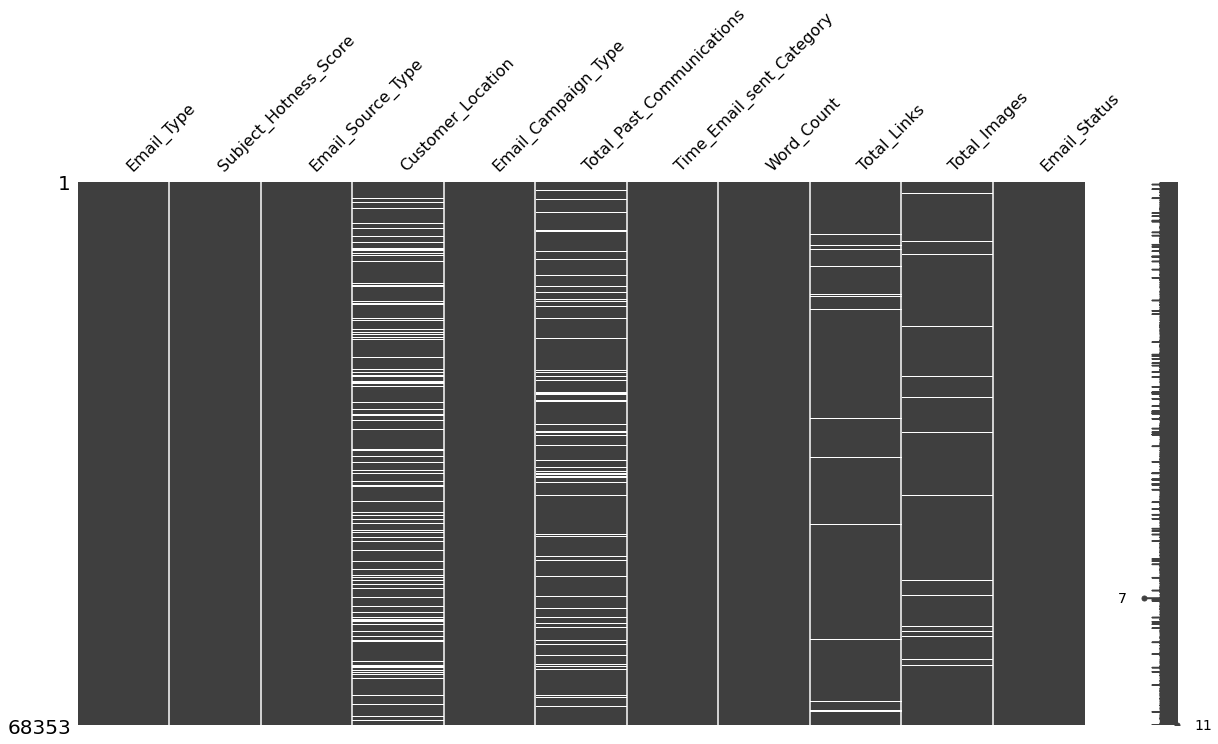

In [ ]:
# missing value
mno.matrix(email_df, figsize = (20, 10))

In [ ]:
email_df.isnull().sum()

Email_Type                       0
Subject_Hotness_Score            0
Email_Source_Type                0
Customer_Location            11595
Email_Campaign_Type              0
Total_Past_Communications     6825
Time_Email_sent_Category         0
Word_Count                       0
Total_Links                   2201
Total_Images                  1677
Email_Status                     0
dtype: int64

## We can see that 4 columns is having null
## Customer_Location is having 11595 null values
## Total_Past_Communications is having 6825 null values
## Total_Links is having 2201 null values
## Total_Images is having 1677 null values
##But particularly customer location has a lot of them. Since it is a categorical column and it is difficult to just impute them with our understanding of where the customer's location is, we'll see how much it affects our target variable, whether a particular location has anything to do with it or it is not correlated at all and accordingly we can decide on it later on. Let's fill up the null values in other columns. 

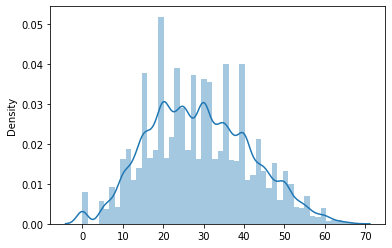

In [ ]:
#let's see the distribution of Total Past Communications to get what majority of the data tends to so that we can fill it accordingly
sns.distplot(x=email_df['Total_Past_Communications'], hist = True)

##We have kind of a normal ditribution for Total Past Communications and it will be fine, if we use mean to fill up the null values of this column.

In [ ]:
#filling up the null values for total past comm
email_df['Total_Past_Communications'].fillna(email_df['Total_Past_Communications'].mean(), inplace = True)

##Now lets find out which method we should use to fill missing values of Total_Links column

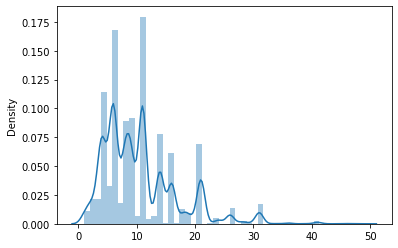

In [ ]:
#let's see the distribution of Total Links to get what majority of the data tends to so that we can fill it accordingly
sns.distplot(x=email_df['Total_Links'], hist= True)

##It seems like most of the values of the Total Links in the column are between 0-10 and the distribution is skewed on the right. Mode is more robust to outlier effect.

In [ ]:
#filling up the Total Links Column
email_df['Total_Links'].fillna(email_df['Total_Links'].mode()[0], inplace = True)

##Now lets find out which metrics we should use to fill missing values of Total_Images column

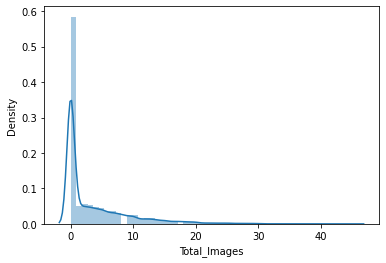

In [ ]:
sns.distplot(email_df.Total_Images)

##The number of images in most of the emails seems to be 0 or fewer than 3-4. It would be wise to fill the null values with mode values.

In [ ]:
#filling up the Total Images Column
email_df['Total_Images'].fillna(email_df['Total_Images'].mode()[0], inplace = True)

In [ ]:
#check for duplicates
email_df.duplicated().sum()

32

##Hence, we can observe that there are no duplications of data.

##**Exploratory Data Analysis:**
##Exploratory data analysis is an important part of data analysis. It involves exploring and analyzing the dataset given to find out patterns, trends and conclusions to take better decisions related to the data. In this section, we will be trying to obtain those features which help our emails not get ignored.

##We will explore every feature against our target variable and analyze it's influence on it.

In [ ]:
#creating new dataframe of only categorical columns
categorical_variables = email_df.select_dtypes(include =['object','int']).copy()
#dropping Word_Count because it's numeric data
categorical_variables.drop('Word_Count',axis=1,inplace=True)

In [ ]:
ds_cat_stats = pd.DataFrame(columns = ['Column', 'Values', 'Total Count', 'Total_COunt_Excluding_Null', 
                                       'Missing Value', 'Missing %'])
tmp = pd.DataFrame()

for c in categorical_variables.columns:
    tmp['Column'] = [c]
    tmp['Values'] = [categorical_variables[c].unique()]
    tmp['Total Count'] = len(list(categorical_variables[c].unique()))
    tmp['Total_COunt_Excluding_Null'] = int(categorical_variables[c].nunique())
    tmp['Missing Value'] = categorical_variables[c].isnull().sum()
    tmp['Missing %'] = (categorical_variables[c].isnull().sum()/ len(categorical_variables)).round(3)*100
    ds_cat_stats = ds_cat_stats.append(tmp)
    
ds_cat_stats

Column  ... Missing %
0                Email_Type  ...       0.0
0         Email_Source_Type  ...       0.0
0         Customer_Location  ...      17.0
0       Email_Campaign_Type  ...       0.0
0  Time_Email_sent_Category  ...       0.0
0              Email_Status  ...       0.0

[6 rows x 6 columns]

#**Observation:**
* As we can see we have 17% missing values in Customer Location.

* There is no missing values in any other categorical variable.

* Email_Type and Email_Source_Type have 2 categories.

* Email_Campaign_Type,Time_Email_sent_Category and Email_Status have 3 Categories

* Look at the Variable 'Customer_Location' -- distinct categories are 8 but without nans it is 7.

<Figure size 720x432 with 0 Axes>

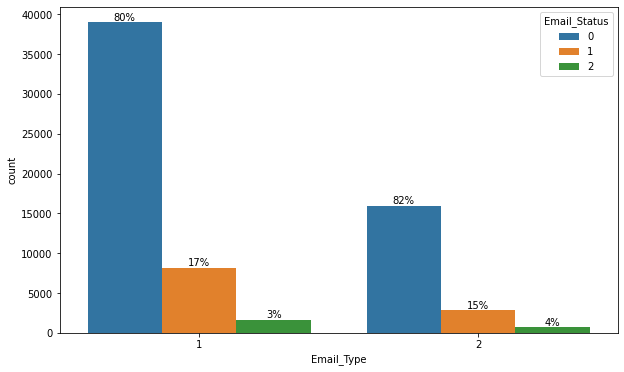

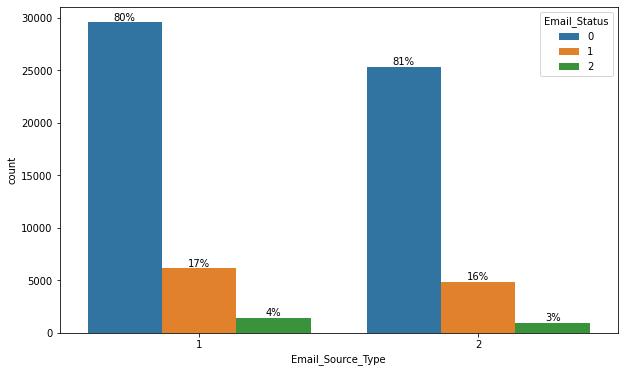

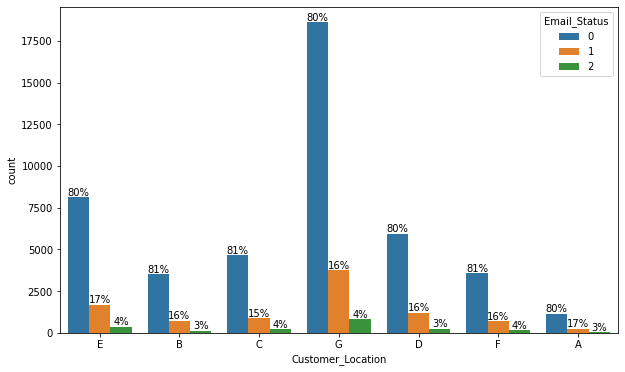

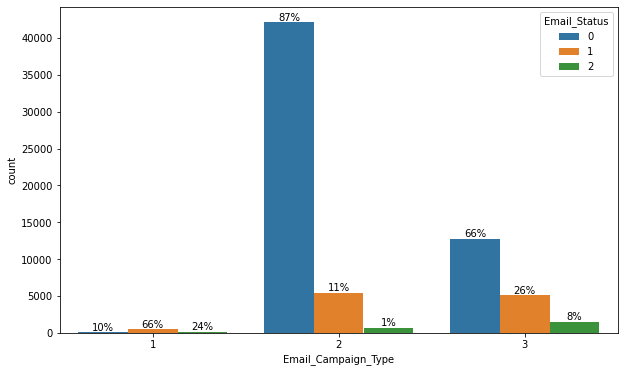

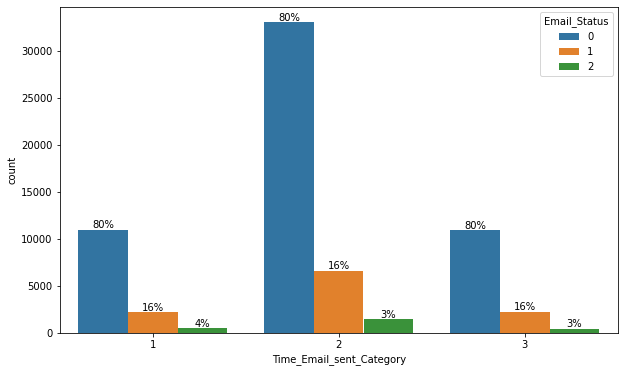

In [ ]:

categorical_variables = ['Email_Type','Email_Source_Type','Customer_Location','Email_Campaign_Type','Time_Email_sent_Category']
Target_var = ['Email_Status']
plt.figure(figsize=(10, 6))
for i,value in enumerate(categorical_variables):
  plt.figure(figsize=(10, 6))
  ax = sns.countplot(x=email_df[value], hue=email_df[Target_var[0]])
  unique = len([x for x in email_df[value].unique() if x==x])
  bars = ax.patches
  
  for i in range(unique):
      
      catbars=bars[i:][::unique]
      #get height
      total = sum([x.get_height() for x in catbars])
      #print percentage
      for bar in catbars:
        
        ax.text(bar.get_x()+bar.get_width()/2.,
                    bar.get_height(),
                    f'{bar.get_height()/total:.0%}',
                    ha="center",va="bottom")
  
  plt.show()


##**Observation:**

* The email type 1 which may be considered as promotional emails are sent more than email type 2 and hence are read and acknowledged more than the other type otherwise the proportion of ignored, read, acknowledged emails are kind of same in both email types.

* Email source type shows kind of a similar pattern for both the categories.

* In the customer location feature we can find that irrespective of the location, the percentage ratio of emails being ignored, read and acknowledge are kind of similar. It does not exclusively influence our target variable. It would be better to not consider location as factor in people ignoring, reading or acknowledging our emails. Other factors should be responsible in why people are ignoring the emails not location.

* In the Email Campaign Type feature, it seems like in campaign type 1 very few emails were sent but has a very high likelihood of getting read. Most emails were sent under email campaign type 2 and most ignored. Seems like campaign 3 was a success as even when less number of emails were sent under campaign 3, more emails were read and acknowledged.

* If we consider 1 annd 3 as morning and night category in time email sent feature, it is obvious to think 2 as middle of the day and as expected there were more emails sent under 2nd category than either of the others, sending emails in the middle of the day could lead to reading and opening the email as people are generally working at that time and they frequently checkup their emails, but it cannot be considered as the major factor in leading to acknowledged emails.


## As we can see irrespective of location the ratio of **Email_Status** is same throughout .So we can drop the location column

In [ ]:
#dropping Customer_Location column
email_df.drop('Customer_Location',inplace=True,axis=1)
print('Shape of data after dropping ',email_df.shape)

Shape of data after dropping  (68353, 10)


In [ ]:
email_df['Email_Status'].value_counts()

0    54941
1    11039
2     2373
Name: Email_Status, dtype: int64

In [ ]:
Target=email_df.Email_Status.value_counts().reset_index().rename(columns={'Email_Status':'Count','index':'Email_Status'})
Target

Email_Status  Count
0             0  54941
1             1  11039
2             2   2373

In [ ]:

fig = px.bar(x= Target.Email_Status,y=Target.Count,orientation=None , width=550, height=350,
             )
fig.update_layout(
    xaxis_title="Email status",
    yaxis_title="Count",
)
fig.show()

## we can see that over target variable is highly imbalanced.

In [ ]:
email_df.isna().sum()

Email_Type                   0
Subject_Hotness_Score        0
Email_Source_Type            0
Email_Campaign_Type          0
Total_Past_Communications    0
Time_Email_sent_Category     0
Word_Count                   0
Total_Links                  0
Total_Images                 0
Email_Status                 0
dtype: int64

## So now we don't have any null values in our data set

##**Analysis of Numerical Data**

In [ ]:
#creating new dataframe of only numerical columns
ds_num = email_df.select_dtypes(include =['float']).copy()
ds_num['Word_Count'] = email_df.loc[ds_num.index, 'Word_Count'].copy()
ds_num.head()

Subject_Hotness_Score  Total_Past_Communications  ...  Total_Images  Word_Count
0                    2.2                       33.0  ...           0.0         440
1                    2.1                       15.0  ...           0.0         504
2                    0.1                       36.0  ...           0.0         962
3                    3.0                       25.0  ...           0.0         610
4                    0.0                       18.0  ...           0.0         947

[5 rows x 5 columns]

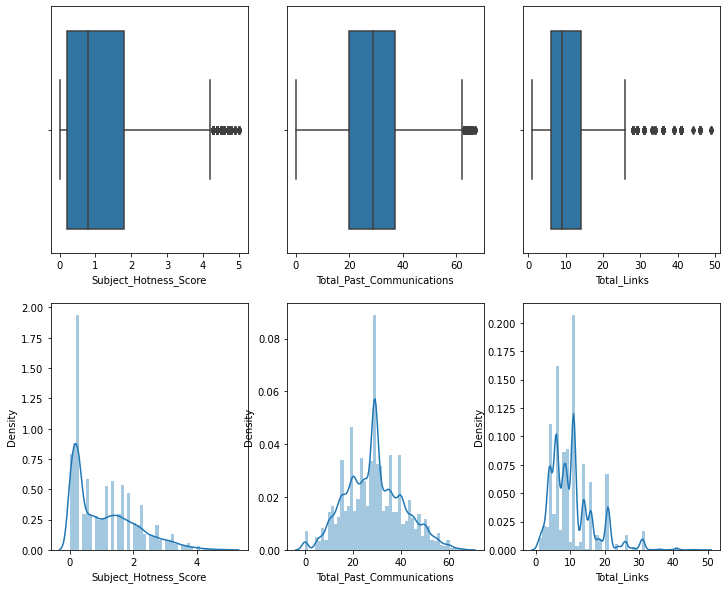

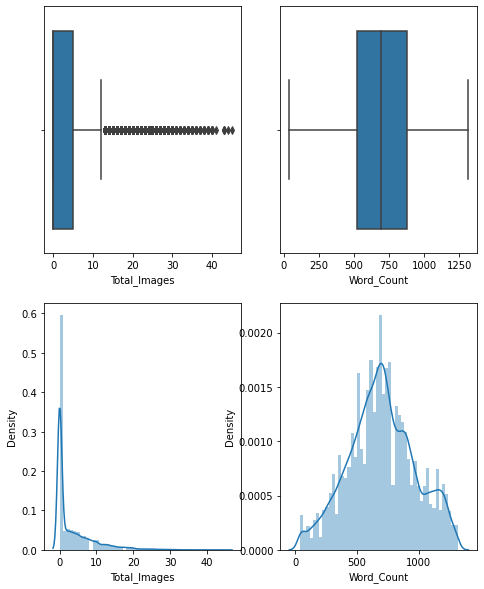

In [ ]:
ix = 1
fig = plt.figure(figsize = (12,10))
for c in list(ds_num.columns):
    if ix <= 3:
            ax1 = fig.add_subplot(2,3,ix)
            sns.boxplot(data = ds_num, x=c, ax = ax1)
            ax2 = fig.add_subplot(2,3,ix+3)
            sns.distplot(ds_num[c], ax=ax2)
            
    ix = ix +1
    if ix == 4: 
        fig = plt.figure(figsize = (12,10))
        ix =1

##We already saw the distribution plots of Total Links, Total Images and Total Past Communications earlier. Here we see that Word Count just as Total Past Communications has a normal distribution. All of the rest are rightly skewed which indicates the presence of outliers.

##Lets look at the relationship between the dependent variable and independent variable. In order to do that let's add our dependent variable to this dataset.

In [ ]:
# creating function for box plot
def boxplot(df,x,y):
  fig = px.box(df,x=x,y=y,orientation='v',color='Email_Status',height=400,width=450)
  fig.show()


In [ ]:
boxplot(email_df,'Email_Status','Subject_Hotness_Score')

In [ ]:
boxplot(email_df,'Email_Status','Total_Past_Communications')

In [ ]:
boxplot(email_df,'Email_Status','Total_Links')

In [ ]:
boxplot(email_df,'Email_Status','Total_Images')

In [ ]:
boxplot(email_df,'Email_Status','Word_Count')

##**Observation:**

* In the subject hotness score, median of ignored emails was around 1 with a few outliers. Acknowledged emails has the most outliers. It is observed that the Subject_Hotness_Score for read and acknowledged emails are much lower.
* Analyzing total past communications, we can see that the more the number of previous emails, the more it leads to read and acknowledged emails. This is just about making connection with your customers.

* The more the words in an email, the more it has a tendency to get ignored. Too lengthy emails are getting ignored.

* The median is kind of similar in all of the three cases in total links feature with a number of outliers.

* More images were there in ignored emails.

* There are considerable number of outliers in Subject_Hotness_Score, Total_Links and Total_Images.



##**Correlation**: To get an understanding of how much correlated, positively or negatively our features is with our target variable, we will be creating a correlation matrix.

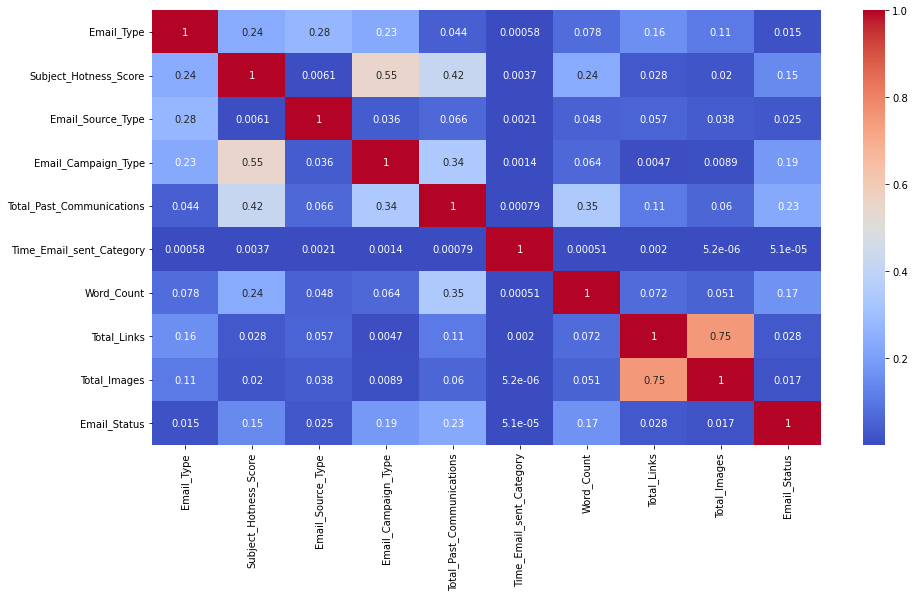

In [ ]:
## Correlation
plt.figure(figsize=(15,8))
correlation = email_df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

##**observation:**
* We can see multicollinearity involved in Email Campaign Type, Total past communication and Total links, Total Images among others and we will have to deal with it.
* We can observe that there is a relationship between Total_Images and Total_Links, they have 75% correlation. To understand if this relation holds true, we try and validate with a trendline plot b/w the two features.

In [ ]:
# plotting trendline graph
fig = px.scatter(email_df, x="Total_Images", y="Total_Links", trendline="ols",color="Email_Status",width=600)

fig.show()

##We can conclude from the above information that there is a high positive correlation between these two features  So we can combine Links and Images column into one. Lets now understand each feature individually.

In [ ]:
email_df['Total_Images'].describe()

count    68353.000000
mean         3.463564
std          5.555121
min          0.000000
25%          0.000000
50%          0.000000
75%          5.000000
max         45.000000
Name: Total_Images, dtype: float64

## we can see that the minimum image count is 0 in **Total_Images** column and maximum is 45.
## lets check that attaching Images in email does have any effect on email status

In [ ]:
fig = px.histogram(email_df, x="Total_Images", y="Email_Status",
             color='Email_Status', barmode='group',
             height=400)
fig.show()

##**Observation:**
## As we can see that attaching images with email doesnt have any effect 
## Emails without images have a high probability that your mail is being read or acknowledge by customers


In [ ]:
fig = px.box(email_df,x="Total_Images",orientation='h',width=500)
fig.show()

More than 50% of values are 0 and there are there is a presence of outliers in **Total_Images**

In [ ]:
email_df['Total_Links'].describe()

count    68353.000000
mean        10.447895
std          6.280463
min          1.000000
25%          6.000000
50%          9.000000
75%         14.000000
max         49.000000
Name: Total_Links, dtype: float64

## we can see that the minimum image count is 1 in **Total_Links** column and maximum is 49.
## lets check that attaching links in email does have any effect on email status

In [ ]:
fig = px.histogram(email_df, x="Total_Links", y="Email_Status",
             color='Email_Status', barmode='group',
             height=400)
fig.show()

##**Observation**
## From above plot we can see that attaching links with Emails is having significant effect 
## An email with 4-15 links makes it more likely that your email is being read or acknowledge by a customer

In [ ]:
fig = px.box(email_df,x="Total_Links",orientation='h',width=500)
fig.show()

##Compared to Total_Images, Total_Links has very few outliers.
##Since images and links are correlated and most of the values in Total_Images is 0 we will combine both the features.

In [ ]:
# df of Subject_Hotness_Score where Email_Status=0
sub0=email_df.loc[email_df['Email_Status']==0,['Subject_Hotness_Score']].value_counts().reset_index().rename(columns={'Subject_Hotness_Score':'Subject_Hotness_Score',0:'Ignore'})


In [ ]:
# bar plot
fig = px.bar(x= sub0.Subject_Hotness_Score,y=sub0.Ignore,orientation=None , width=800, height=350
             )
fig.update_layout(
    xaxis_title="Subject_Hotness_Score",
    yaxis_title="Ignore",
)
fig.show()

## From above plot as we can see emails are most commonly ignored by the client when the **Subject_Hotness_Score** is between 0-0.3

In [ ]:
# df of Subject_Hotness_Score where Email_Status=1

sub1=email_df.loc[email_df['Email_Status']==1,['Subject_Hotness_Score']].value_counts().reset_index().rename(columns={'Subject_Hotness_Score':'Subject_Hotness_Score',0:'Read'})


In [ ]:
# bar plot
fig = px.bar(x= sub1.Subject_Hotness_Score,y=sub1.Read,orientation=None , width=800, height=350
             )
fig.update_layout(
    xaxis_title="Subject_Hotness_Score",
    yaxis_title="Read",
)
fig.show()

## Similarly here we can see that the most read email by the customer is when the Subject_Hotness_Score is between 0-0.3 

In [ ]:
# df of Subject_Hotness_Score where Email_Status=0
sub=email_df.loc[email_df['Email_Status']==2,['Subject_Hotness_Score']].value_counts().reset_index().rename(columns={'Subject_Hotness_Score':'Subject_Hotness_Score',0:'Acknowledge'})


In [ ]:
# bar plot
fig = px.bar(x= sub.Subject_Hotness_Score,y=sub.Acknowledge,orientation=None , width=800, height=350
             )
fig.update_layout(
    xaxis_title="Subject_Hotness_Score",
    yaxis_title="Acknowledge",
)
fig.show()

##Same is the case here as we have seen from above 2 plots , so we can say that there is no significant effect of subject hotness score whether it is between 0-0.3 or higher.

#**Data Manipulation and Feature Engineering:**
Data manipulation involves manipulating and changing our dataset before feeding it to various clasification machine learning models. This involves keeping important features handling multicollinearity in the dataset, outlier treatment and creating dummy variables if necessary.

We have outliers in our dataset as we saw it earlier in data exploration but as the classes are imbalanced and we cannot also risk overfitting, so we will be exploring how many outliers we have in each class and then decide whether we should keep them or get rid of them.

##**Multicollinearity and Feature Selection:**

Multicollinearity occurs when two or more independent continuous features in the dataset are highly correlated and can help predict each other and the dependent variable. This makes it difficult to individually analyse the affect of these individual independent variables on the target or dependent variable.

We can quantify multicollinearity using Variance Inflation Factors (VIF).

VIF = 1/(1-R^2) The more the value of R^2 is closer to 1 the more, VIF score tends to infinity. VIF starts with 1 and denotes that the variable has no correlation at all. VIF more than 5-10 can be considered as serious case of multicollinearity and can affect prediction models.

In [ ]:
#VIF code
def vif_calc(df):
  vif = pd.DataFrame()
  vif["variables"] = df.columns
  vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
  return(vif)

In [ ]:
#let's get VIF scores
vif_df = vif_calc(email_df[[i for i in email_df.describe().columns if i not in categorical_variables + ['Email_Status']]])
vif_df

variables       VIF
0      Subject_Hotness_Score  1.805701
1  Total_Past_Communications  3.939214
2                 Word_Count  4.065844
3                Total_Links  8.690857
4               Total_Images  3.171439

##We can see that only Total Links is higher than 5. Earlier we saw that Total Images and Total Links are highly correlated to each other with a score of 0.75. We can try combining both of these

In [ ]:
#we can try combining them up
email_df['Total_Img_links'] = email_df['Total_Images'] + email_df['Total_Links']
email_df.drop(['Total_Images','Total_Links'],inplace=True,axis=1)

In [ ]:
#let's check VIF scores after combining features
vif_df = vif_calc(email_df[[i for i in email_df.describe().columns if i not in categorical_variables + ['Email_Status']]])
vif_df

variables       VIF
0      Subject_Hotness_Score  1.734531
1  Total_Past_Communications  3.430879
2                 Word_Count  3.687067
3            Total_Img_links  2.629047

##Now we have our multicollinearity in check!!

##**Outliers:**

With the help of box-plots, we earlier saw that besides Word Count all our other continuous variables have outliers, but deleting them would lead to loss of information as our target variable is highly imbalanced we need to make sure that we aren't deleting more than 5% of information or data related to the minority class

In [ ]:
#Let's check the number of outliers in each category of diff continuous features

cont_var=['Subject_Hotness_Score','Total_Img_links','Total_Past_Communications']

In [ ]:
#the number of outliers in different features acc to email_status
outliers = {}
for elem in cont_var:
  q_75, q_25 = np.percentile(email_df.loc[:,elem],[75,25])
  IQR = q_75-q_25
  max = q_75+(1.5*IQR)
  min = q_25-(1.5*IQR)
  outlier_list=[]
  outlier_list=email_df.loc[email_df[elem] < min]['Email_Status'].tolist()
  outlier_list.append(email_df.loc[email_df[elem] > max]['Email_Status'].tolist()) 
  outliers[elem]={}
  for i in outlier_list[0]:
      outliers[elem][i] = outliers[elem].get(i,0) + 1

print(outliers)

{'Subject_Hotness_Score': {0: 170, 1: 76, 2: 1}, 'Total_Img_links': {0: 3061, 1: 437, 2: 122}, 'Total_Past_Communications': {1: 56, 0: 67, 2: 13}}


##We calculated the number of outliers with respect to the individual classes of our target variable. The minority class in our target variable is 1 and 2. But when we get rid of outliers we should check that we aren't deleting more than 5% of useful information related to minority class. Otherwise, the model will not be able to classify our minority classes correctly having lack of information. Let's check the percentage of outliers in minority class.

In [ ]:
email_df['Email_Status'].value_counts()[2]

2373

In [ ]:
#percentage of outliers in minority class
minority_outliers = 0  
majority_outliers = 0
for col in cont_var:
  minority_outliers += outliers[col][1]
  minority_outliers += outliers[col][2]
  majority_outliers += outliers[col][0]

total_min = email_df['Email_Status'].value_counts()[1] + email_df['Email_Status'].value_counts()[2]
total_maj = email_df['Email_Status'].value_counts()[0]

min_per = (minority_outliers/total_min)*100   #number of outliers in minority classes by total number minority classes
maj_per = (majority_outliers/total_maj)*100  #number of outliers in majority class by total number of majority class

print(f'The percentage of outliers in minority classes is {min_per}')
print(f'The percentage of outliers in majority class is {maj_per}')

The percentage of outliers in minority classes is 5.256486728303012
The percentage of outliers in majority class is 6.002803006861907


##We have seen our data highly imbalance and we have more than 5% outliers in minority section and hence to avoid lack of information, we decide against deleting them.

##**Feature Scaling**

Feature Scaling is a technique to standardize the independent features present in the data in a fixed range. It is done to prevent biased nature of machine learning algorithms towards features with greater values and scale.

In [ ]:
#let's add word count
cont_var.append('Word_Count')

In [ ]:
# apply normalization techniques
for elem in cont_var:
  email_df[elem] = (email_df[elem] - email_df[elem].min()) / (email_df[elem].max() - email_df[elem].min())

email_df.head(1)

Email_Type  Subject_Hotness_Score  ...  Email_Status  Total_Img_links
0           1                   0.44  ...             0         0.076087

[1 rows x 9 columns]

##**One hot encoding**

For categorical variables where no such ordinal relationship exists, the integer encoding is not enough. We have categorical data integer encoded with us, but assuming a natural order and allowing this data to the model may result in poor performance. If the categorical variable is an output variable, you may also want to convert predictions by the model back into a categorical form in order to present them or use them in some application.

In [ ]:
#getting dummy variables for categorical data
categorical_variables.remove('Customer_Location')

In [ ]:
#categorical var that need to be encoded
categorical_variables

['Email_Type',
 'Email_Source_Type',
 'Email_Campaign_Type',
 'Time_Email_sent_Category']

In [ ]:
#creating dummy variables
email_df = pd.get_dummies(email_df,columns=categorical_variables)
# as some features had binary categories, we are going to delete one of them to keep it binary encoded and have less columns
email_df.drop('Email_Type_2',axis=1,inplace=True)
email_df.drop('Email_Source_Type_2',axis=1,inplace=True)
email_df.head(1)

Subject_Hotness_Score  ...  Time_Email_sent_Category_3
0                   0.44  ...                           0

[1 rows x 13 columns]

In [ ]:
#shape
email_df.shape

(68353, 13)

In [ ]:
#Email_Status should be the last col
columns=list(email_df.columns)
columns.remove('Email_Status')
columns.append('Email_Status')
email_df=email_df[columns]
email_df.head(2)

Subject_Hotness_Score  ...  Email_Status
0                   0.44  ...             0
1                   0.42  ...             0

[2 rows x 13 columns]

In [ ]:
email_df.shape

(68353, 13)

In [ ]:
#X and Y 
X = email_df.drop('Email_Status',axis=1)
y = email_df['Email_Status']
print(f'Shape of X: {X.shape}')
print(f'Shape of Y: {y.shape}')

Shape of X: (68353, 12)
Shape of Y: (68353,)


In [ ]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y) 
#we need to stratify to get same proprtion of classes in both the sets

##**Handling Class Imbalance**

##In the exploratory data analysis, we clearly saw that the number of emails being ignored was a lot more than being read and acknowledged. This imbalance in the class, can lead to biased classification towards ignored emails. We can handle it with Oversampling and Undersampling.

##First, we will go with Random Undersampling and check the results for various models that we will be testing and then with SMOTE. This technique generates synthetic data for the minority class. Lastly, we will analyze which method works for the best for our dataset.

##Random undersampling involves randomly selecting examples from the majority class to delete from the training dataset.

##SMOTE (Synthetic Minority Oversampling Technique) works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

##SMOTETomek is somewhere upsampling and downsampling. SMOTETomek is a hybrid method which is a mixture of the above two methods, it uses an under-sampling method (Tomek) with an oversampling method (SMOTE). This is present within imblearn.combine module.
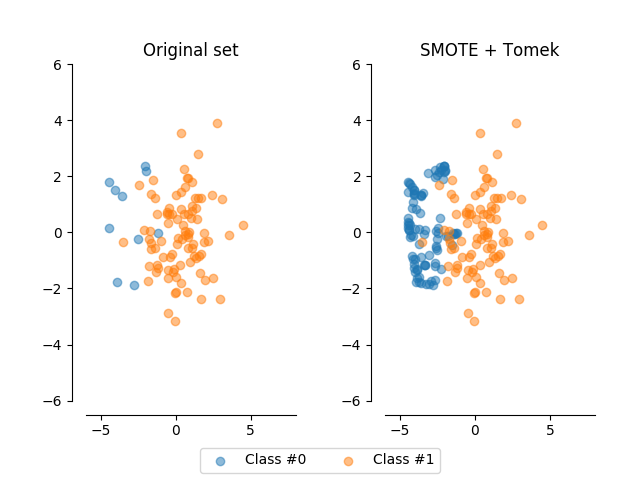

Text(0.5, 1.0, 'Pie Chart showing Email Status')

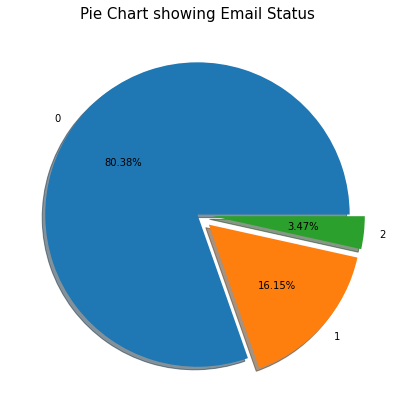

In [ ]:
# Plotting a pie chart for Email_Status
plt.figure(figsize = (10,7))
plt.pie(email_df['Email_Status'].value_counts(), labels = [0,1,2], explode = [0,0.1,0.1], autopct='%1.2f%%', shadow = True)
plt.title('Pie Chart showing Email Status', fontsize = 15)

##Only 3% of observations are classified as acknowledged emails and 80% are ignored emails. This will create a bias in favour of ignored emails in the model.



##We will be applying the Random Under Sampler and SMOTE and SMOTETomek  algorithms to balance our classes on the train set only, so that the model doesn't catch up to the test set at all. Before balancing, we made sure the train split has class distribution as same as the main dataset by using stratify while splitting.

##**Random Undersampling:**

In [ ]:
#resample
rus = RandomUnderSampler(random_state=42, replacement=True)
x_train_rus, y_train_rus = rus.fit_resample(X_train,y_train)

#print shape
print('Original dataset shape:', len(y_train))
print('Resampled dataset shape', len(y_train_rus))

Original dataset shape: 54682
Resampled dataset shape 5694


Class=0, n=1898 (33.333%)
Class=1, n=1898 (33.333%)
Class=2, n=1898 (33.333%)


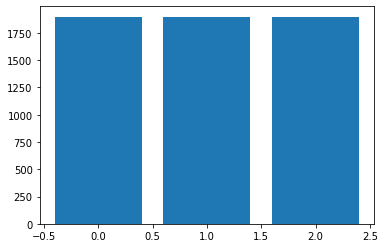

In [ ]:
#visualization of resampled data
def resampled_data_visual(y_train_rus):
  counter = Counter(y_train_rus)
  for key,value in counter.items():
    per = value / len(y_train_rus) * 100
    print('Class=%d, n=%d (%.3f%%)' % (key, value, per))
  # plot the distribution
  plt.bar(counter.keys(), counter.values())
  plt.show()

resampled_data_visual(y_train_rus)

##**SMOTE:**

In [ ]:
#SMOTE
smote = SMOTE()

# fit predictor and target variable
x_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print('Original dataset shape', len(y_train))
print('Resampled dataset shape', len(y_train_smote))

Original dataset shape 54682
Resampled dataset shape 131859


Class=1, n=43953 (33.333%)
Class=0, n=43953 (33.333%)
Class=2, n=43953 (33.333%)


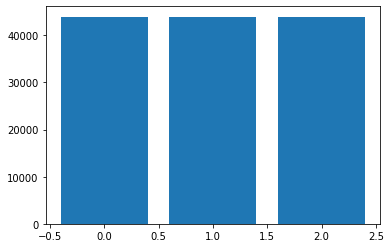

In [ ]:
#visualization of resampled data
resampled_data_visual(y_train_smote)

##**SMOTETomek**

In [ ]:
from imblearn.combine import SMOTETomek 
smotom= SMOTETomek(random_state=0)
x_train_smotom, y_train_smotom = smotom.fit_resample(X_train, y_train)
print('Original dataset shape', len(y_train))
print('Resampled dataset shape', len(y_train_smotom))

Original dataset shape 54682
Resampled dataset shape 127537


Class=0, n=42074 (32.990%)
Class=2, n=43172 (33.851%)
Class=1, n=42291 (33.160%)


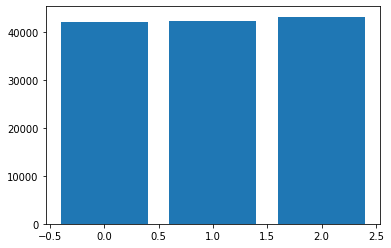

In [ ]:
resampled_data_visual(y_train_smotom)

#**Logistic Regression:**
##Logistic Regression is a classification algorithm that predicts the probability of an outcome that can have only two values.

##Multinomial logistic regression is an extension of logistic regression that adds native support for multi-class classification problems.

In [ ]:
#fitting Undersampling
logistic_rus = LogisticRegression(class_weight='balanced',multi_class='multinomial', solver='lbfgs')
logistic_rus.fit(x_train_rus, y_train_rus)

LogisticRegression(class_weight='balanced', multi_class='multinomial')

In [ ]:
#fitting on smote
logistic_smote = LogisticRegression(class_weight='balanced',multi_class='multinomial', solver='lbfgs')
logistic_smote.fit(x_train_smote, y_train_smote)

LogisticRegression(class_weight='balanced', multi_class='multinomial')

In [ ]:
#fitting on smote
logistic_smotom= LogisticRegression(class_weight='balanced',multi_class='multinomial', solver='lbfgs')
logistic_smotom.fit(x_train_smotom, y_train_smotom)

LogisticRegression(class_weight='balanced', multi_class='multinomial')

In [ ]:
#Columns needed to compare metrics
comparison_columns = ['Model_Name', 'Train_Accuracy', 'Train_Recall', 'Train_Precision', 'Train_F1score',
                      'Train_AUC' ,'Test_Accuracy', 'Test_Recall', 'Test_Precision', 'Test_F1score', 'Test_AUC']


In [ ]:
#Function to evaluate the model

def model_evaluation(model_name_RUS,model_name_SMOTE,model_name_somtom,model_var_rus, model_var_smote,model_var_smotom, x_train_rus, y_train_rus, x_train_smote, y_train_smote,
                     x_train_smotom, y_train_smotom, X_test, y_test):
  ''' This function predicts and evaluates various models for clasification for Random Undersampling and SMOTE algorithms, visualizes results 
      and creates a dataframe that compares the various models.'''
  
  #Making predictions random undersampling
  y_pred_rus_train = model_var_rus.predict(x_train_rus)
  y_pred_rus_test = model_var_rus.predict(X_test)
  #probs
  train_rus_proba = model_var_rus.predict_proba(x_train_rus)
  test_rus_proba = model_var_rus.predict_proba(X_test)

  #Making predictions smote
  y_pred_smote_train = model_var_smote.predict(x_train_smote)
  y_pred_smote_test = model_var_smote.predict(X_test)
  #probs
  train_sm_proba = model_var_smote.predict_proba(x_train_smote)
  test_sm_proba = model_var_smote.predict_proba(X_test)

  #Making predictions SmoteTomek
  y_pred_smotom_train = model_var_smotom.predict(x_train_smotom)
  y_pred_smotom_test = model_var_smotom.predict(X_test)
  #probs
  train_smt_proba = model_var_smotom.predict_proba(x_train_smotom)
  test_smt_proba = model_var_smotom.predict_proba(X_test)

  #Evaluation 
  #Accuracy RUS
  accuracy_rus_train = accuracy_score(y_train_rus,y_pred_rus_train)
  accuracy_rus_test = accuracy_score(y_test,y_pred_rus_test)
  #Accuracy SMOTE
  accuracy_smote_train = accuracy_score(y_train_smote,y_pred_smote_train)
  accuracy_smote_test = accuracy_score(y_test,y_pred_smote_test)
  #Accuracy SmoteTomek
  accuracy_smotom_train = accuracy_score(y_train_smotom,y_pred_smotom_train)
  accuracy_smotom_test = accuracy_score(y_test,y_pred_smotom_test)

  #Confusion Matrix RUS
  cm_rus_train = confusion_matrix(y_train_rus,y_pred_rus_train)
  cm_rus_test = confusion_matrix(y_test,y_pred_rus_test)
  #Confusion Matrix SMOTE
  cm_smote_train = confusion_matrix(y_train_smote,y_pred_smote_train)
  cm_smote_test = confusion_matrix(y_test,y_pred_smote_test)
  #Confusion Matrix SmoteTomek
  cm_smotom_train = confusion_matrix(y_train_smotom,y_pred_smotom_train)
  cm_smotom_test = confusion_matrix(y_test,y_pred_smotom_test)

  #Recall RUS
  train_recall_rus = recall_score(y_train_rus,y_pred_rus_train, average='weighted')
  test_recall_rus = recall_score(y_test,y_pred_rus_test, average='weighted')
  #Recall SMOTE
  train_recall_smote = recall_score(y_train_smote,y_pred_smote_train, average='weighted')
  test_recall_smote = recall_score(y_test,y_pred_smote_test, average='weighted')
  #Recall SmoteTomek
  train_recall_smotom = recall_score(y_train_smotom,y_pred_smotom_train, average='weighted')
  test_recall_smotom = recall_score(y_test,y_pred_smotom_test, average='weighted')

 #Precision RUS
  train_precision_rus = precision_score(y_train_rus,y_pred_rus_train, average='weighted')
  test_precision_rus = precision_score(y_test,y_pred_rus_test, average='weighted')
  #Precision SMOTE
  train_precision_smote = precision_score(y_train_smote,y_pred_smote_train, average='weighted')
  test_precision_smote = precision_score(y_test,y_pred_smote_test, average='weighted')
 #Precision SmoteTomek
  train_precision_smotom = precision_score(y_train_smotom,y_pred_smotom_train, average='weighted')
  test_precision_smotom = precision_score(y_test,y_pred_smotom_test, average='weighted')


  #F1 Score RUS
  train_f1_rus = f1_score(y_train_rus,y_pred_rus_train, average='weighted')
  test_f1_rus = f1_score(y_test,y_pred_rus_test, average='weighted')
  #F1 Score SMOTE
  train_f1_smote = f1_score(y_train_smote,y_pred_smote_train, average='weighted')
  test_f1_smote = f1_score(y_test,y_pred_smote_test, average='weighted')
  #F1 Score SmoteTomek
  train_f1_smotom = f1_score(y_train_smotom,y_pred_smotom_train, average='weighted')
  test_f1_smotom = f1_score(y_test,y_pred_smotom_test, average='weighted')

  #ROC-AUC RUS
  train_auc_rus = roc_auc_score(y_train_rus,train_rus_proba,average='weighted',multi_class = 'ovr')
  test_auc_rus = roc_auc_score(y_test,test_rus_proba,average='weighted',multi_class = 'ovr')
  #ROC-AUC SMOTE
  train_auc_smote = roc_auc_score(y_train_smote,train_sm_proba,average='weighted',multi_class = 'ovr')
  test_auc_smote = roc_auc_score(y_test,test_sm_proba,average='weighted',multi_class = 'ovr')
  #ROC-AUC SmoteTomek
  train_auc_smotom = roc_auc_score(y_train_smotom,train_smt_proba,average='weighted',multi_class = 'ovr')
  test_auc_smotom = roc_auc_score(y_test,test_smt_proba,average='weighted',multi_class = 'ovr')

  #Visualising Results RUS
  print("----- Evaluation on Random Undersampled data -----" + str(model_name_RUS) + "------")
  print("--------------- Train Data ------------\n")
  print("Confusion matrix \n")
  print(cm_rus_train)
  ax= plt.subplot()
  sns.heatmap(cm_rus_train, annot=True, ax = ax)
  ax.set_xlabel('Predicted labels')
  ax.set_ylabel('True labels')
  ax.set_title('Confusion Matrix Train '+ str(model_name_RUS))
  plt.show()
  print(classification_report(y_train_rus,y_pred_rus_train))

  print("--------------Test data ---------------\n")
  print("Confusion matrix \n")
  print(cm_rus_test)
  ax= plt.subplot()
  sns.heatmap(cm_rus_test, annot=True, ax = ax)
  ax.set_xlabel('Predicted labels')
  ax.set_ylabel('True labels')
  ax.set_title('Confusion Matrix Test '+ str(model_name_RUS))
  plt.show()
  print(classification_report(y_test,y_pred_rus_test))
  #create ROC curve
  fpr = {}
  tpr = {}
  thresh ={}
  no_of_class=3
  for i in range(no_of_class):    
      fpr[i], tpr[i], thresh[i] = metrics.roc_curve(y_test, test_rus_proba[:,i], pos_label=i)
  plt.plot(fpr[0], tpr[0], linestyle='--',color='blue', label='Class 0 vs Others'+"AUC="+str(test_auc_rus))
  plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Others'+"AUC="+str(test_auc_rus))
  plt.plot(fpr[2], tpr[2], linestyle='--',color='orange', label='Class 2 vs Others'+"AUC="+str(test_auc_rus))
  plt.title('Multiclass ROC curve of ' + str(model_name_RUS))
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.legend(loc=4)
  plt.show()




  #Visualising Results SMOTE
  print("----- Evaluation on SMOTE data -------" + str(model_name_SMOTE) + '-----')
  print("--------------- Train Data ------------\n")
  print("Confusion matrix \n")
  print(cm_smote_train)
  ax= plt.subplot()
  sns.heatmap(cm_smote_train, annot=True, ax = ax)
  ax.set_xlabel('Predicted labels')
  ax.set_ylabel('True labels')
  ax.set_title('Confusion Matrix Train ' + str(model_name_SMOTE))
  plt.show()
  print(classification_report(y_train_smote,y_pred_smote_train))

  print("---------------Test data ---------------\n")
  print("Confusion matrix \n")
  print(cm_smote_test)
  ax= plt.subplot()
  sns.heatmap(cm_smote_test, annot=True, ax = ax)
  ax.set_xlabel('Predicted labels')
  ax.set_ylabel('True labels')
  ax.set_title('Confusion Matrix Test ' + str(model_name_SMOTE))
  plt.show()
  print(classification_report(y_test,y_pred_smote_test))
  #create ROC curve
  fpr = {}
  tpr = {}
  thresh ={}
  no_of_class=3
  for i in range(no_of_class):    
      fpr[i], tpr[i], thresh[i] = metrics.roc_curve(y_test, test_sm_proba[:,i], pos_label=i)
  plt.plot(fpr[0], tpr[0], linestyle='--',color='blue', label='Class 0 vs Others'+" AUC="+str(test_auc_smote))
  plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Others'+" AUC="+str(test_auc_smote))
  plt.plot(fpr[2], tpr[2], linestyle='--',color='orange', label='Class 2 vs Others'+" AUC="+str(test_auc_smote))
  plt.title('Multiclass ROC curve of '+ str(model_name_SMOTE))
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.legend(loc=4)
  plt.show()

#Visualising Results SmoteTomek
  print("----- Evaluation on SMOTE data -------" + str(model_name_somtom) + '-----')
  print("--------------- Train Data ------------\n")
  print("Confusion matrix \n")
  print(cm_smotom_train)
  ax= plt.subplot()
  sns.heatmap(cm_smotom_train, annot=True, ax = ax)
  ax.set_xlabel('Predicted labels')
  ax.set_ylabel('True labels')
  ax.set_title('Confusion Matrix Train ' + str(model_name_somtom))
  plt.show()
  print(classification_report(y_train_smotom,y_pred_smotom_train))

  print("---------------Test data ---------------\n")
  print("Confusion matrix \n")
  print(cm_smotom_test)
  ax= plt.subplot()
  sns.heatmap(cm_smotom_test, annot=True, ax = ax)
  ax.set_xlabel('Predicted labels')
  ax.set_ylabel('True labels')
  ax.set_title('Confusion Matrix Test ' + str(model_name_somtom))
  plt.show()
  print(classification_report(y_test,y_pred_smotom_test))
  #create ROC curve
  fpr = {}
  tpr = {}
  thresh ={}
  no_of_class=3
  for i in range(no_of_class):    
      fpr[i], tpr[i], thresh[i] = metrics.roc_curve(y_test, test_smt_proba[:,i], pos_label=i)
  plt.plot(fpr[0], tpr[0], linestyle='--',color='blue', label='Class 0 vs Others'+" AUC="+str(test_auc_smotom))
  plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Others'+" AUC="+str(test_auc_smotom))
  plt.plot(fpr[2], tpr[2], linestyle='--',color='orange', label='Class 2 vs Others'+" AUC="+str(test_auc_smotom))
  plt.title('Multiclass ROC curve of '+ str(model_name_somtom))
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.legend(loc=4)
  plt.show()

  #Saving our results
  global comparison_columns
  metric_scores_rus = [model_name_RUS,accuracy_rus_train,train_recall_rus,train_precision_rus,train_f1_rus,train_auc_rus,accuracy_rus_test,test_recall_rus,test_precision_rus,test_f1_rus,test_auc_rus]
  final_dict_rus = dict(zip(comparison_columns,metric_scores_rus))

  metric_scores_smote = [model_name_SMOTE,accuracy_smote_train,train_recall_smote,train_precision_smote,train_f1_smote,train_auc_smote,accuracy_smote_test,test_recall_smote,test_precision_smote,test_f1_smote,test_auc_smote]
  final_dict_smote = dict(zip(comparison_columns,metric_scores_smote))

  metric_scores_smotom = [model_name_somtom,accuracy_smotom_train,train_recall_smotom,train_precision_smotom,train_f1_smotom,train_auc_smotom,accuracy_smotom_test,test_recall_smotom,test_precision_smotom,test_f1_smotom,test_auc_smotom]
  final_dict_smotom = dict(zip(comparison_columns,metric_scores_smotom))

  dict_list = [final_dict_rus,final_dict_smote,final_dict_smotom]
  return dict_list

In [ ]:
#function to create the comparison table
final_list = []
def add_list_to_final_df(dict_list):
  global final_list
  for elem in dict_list:
    final_list.append(elem)
  global comparison_df
  comparison_df = pd.DataFrame(final_list, columns= comparison_columns)

----- Evaluation on Random Undersampled data -----LogisticReg RUS------
--------------- Train Data ------------

Confusion matrix 

[[1326  230  342]
 [ 573  478  847]
 [ 344  272 1282]]


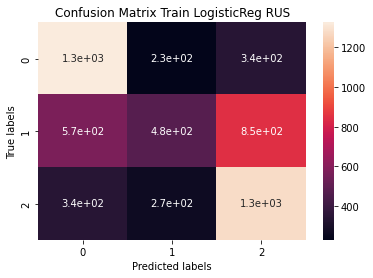

              precision    recall  f1-score   support

           0       0.59      0.70      0.64      1898
           1       0.49      0.25      0.33      1898
           2       0.52      0.68      0.59      1898

    accuracy                           0.54      5694
   macro avg       0.53      0.54      0.52      5694
weighted avg       0.53      0.54      0.52      5694

--------------Test data ---------------

Confusion matrix 

[[7680 1554 1754]
 [ 664  518 1026]
 [  98   70  307]]


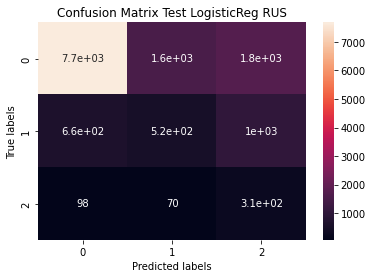

              precision    recall  f1-score   support

           0       0.91      0.70      0.79     10988
           1       0.24      0.23      0.24      2208
           2       0.10      0.65      0.17       475

    accuracy                           0.62     13671
   macro avg       0.42      0.53      0.40     13671
weighted avg       0.77      0.62      0.68     13671



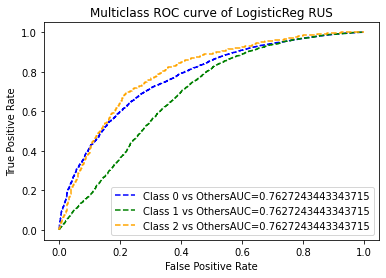

----- Evaluation on SMOTE data -------LogisticReg SMOTE-----
--------------- Train Data ------------

Confusion matrix 

[[30797  5939  7217]
 [13524  9678 20751]
 [ 7895  6014 30044]]


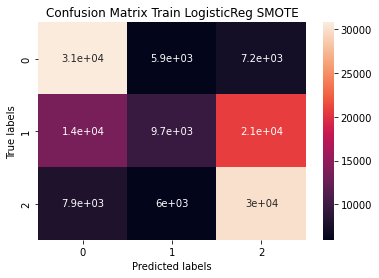

              precision    recall  f1-score   support

           0       0.59      0.70      0.64     43953
           1       0.45      0.22      0.30     43953
           2       0.52      0.68      0.59     43953

    accuracy                           0.53    131859
   macro avg       0.52      0.53      0.51    131859
weighted avg       0.52      0.53      0.51    131859

---------------Test data ---------------

Confusion matrix 

[[7763 1452 1773]
 [ 699  484 1025]
 [ 100   68  307]]


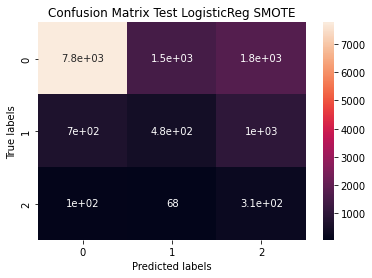

              precision    recall  f1-score   support

           0       0.91      0.71      0.79     10988
           1       0.24      0.22      0.23      2208
           2       0.10      0.65      0.17       475

    accuracy                           0.63     13671
   macro avg       0.42      0.52      0.40     13671
weighted avg       0.77      0.63      0.68     13671



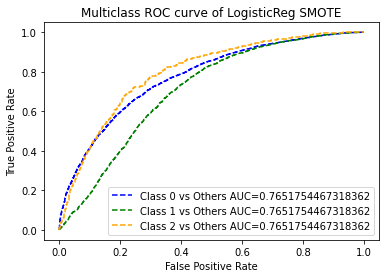

----- Evaluation on SMOTE data -------LogisticReg SMOTETomek-----
--------------- Train Data ------------

Confusion matrix 

[[29726  5475  6873]
 [12703  9293 20295]
 [ 7583  5761 29828]]


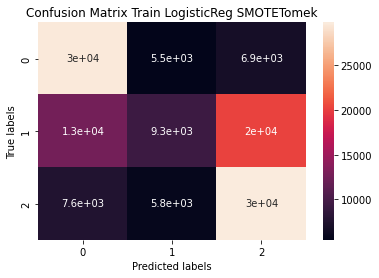

              precision    recall  f1-score   support

           0       0.59      0.71      0.65     42074
           1       0.45      0.22      0.30     42291
           2       0.52      0.69      0.60     43172

    accuracy                           0.54    127537
   macro avg       0.52      0.54      0.51    127537
weighted avg       0.52      0.54      0.51    127537

---------------Test data ---------------

Confusion matrix 

[[7747 1434 1807]
 [ 694  473 1041]
 [  98   66  311]]


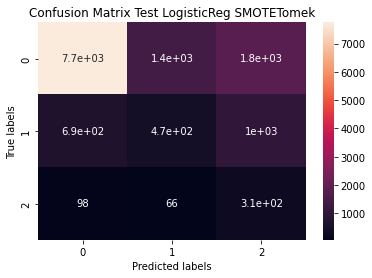

              precision    recall  f1-score   support

           0       0.91      0.71      0.79     10988
           1       0.24      0.21      0.23      2208
           2       0.10      0.65      0.17       475

    accuracy                           0.62     13671
   macro avg       0.42      0.52      0.40     13671
weighted avg       0.77      0.62      0.68     13671



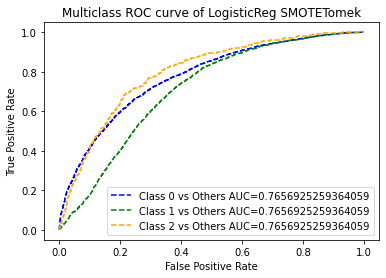

[{'Model_Name': 'LogisticReg RUS',
  'Test_AUC': 0.7627243443343715,
  'Test_Accuracy': 0.6221198156682027,
  'Test_F1score': 0.679839243381541,
  'Test_Precision': 0.7737100197265303,
  'Test_Recall': 0.6221198156682027,
  'Train_AUC': 0.7228344368556848,
  'Train_Accuracy': 0.5419740077274324,
  'Train_F1score': 0.5198207072902474,
  'Train_Precision': 0.53258197700377,
  'Train_Recall': 0.5419740077274324},
 {'Model_Name': 'LogisticReg SMOTE',
  'Test_AUC': 0.7651754467318362,
  'Test_Accuracy': 0.6257040450588838,
  'Test_F1score': 0.6813864989983673,
  'Test_Precision': 0.7711828958438767,
  'Test_Recall': 0.6257040450588838,
  'Train_AUC': 0.7214497646577622,
  'Train_Accuracy': 0.5348061186570503,
  'Train_F1score': 0.5083032900741383,
  'Train_Precision': 0.5183687818206466,
  'Train_Recall': 0.5348061186570503},
 {'Model_Name': 'LogisticReg SMOTETomek',
  'Test_AUC': 0.7656925259364059,
  'Test_Accuracy': 0.6240216516714212,
  'Test_F1score': 0.6802344959767364,
  'Test_Precis

In [ ]:
#Let's evaluate logistic reg
logistic_reg_list = model_evaluation('LogisticReg RUS','LogisticReg SMOTE','LogisticReg SMOTETomek',logistic_rus, logistic_smote, logistic_smotom,x_train_rus, y_train_rus, 
                                     x_train_smote, y_train_smote,x_train_smotom, y_train_smotom, X_test, y_test)
logistic_reg_list

In [ ]:
#adding result to final list
add_list_to_final_df(logistic_reg_list)

In [ ]:
#Taking a look of our final comparison dataframe
comparison_df

Model_Name  Train_Accuracy  ...  Test_F1score  Test_AUC
0         LogisticReg RUS        0.541974  ...      0.679839  0.762724
1       LogisticReg SMOTE        0.534806  ...      0.681386  0.765175
2  LogisticReg SMOTETomek        0.539820  ...      0.680234  0.765693

[3 rows x 11 columns]

#**Decison Tree Model:**
##Decision Trees are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

In [ ]:
#Classifier RUS
dt_rus = DecisionTreeClassifier()
dt_rus.fit(x_train_rus,y_train_rus)

DecisionTreeClassifier()

In [ ]:
#Classifier SMOTE
dt_smote = DecisionTreeClassifier()
dt_smote.fit(x_train_smote,y_train_smote)

DecisionTreeClassifier()

In [ ]:
#Classifier SMOTETomek
dt_smotom = DecisionTreeClassifier()
dt_smotom.fit(x_train_smotom,y_train_smotom)

DecisionTreeClassifier()

----- Evaluation on Random Undersampled data -----Decision Tree RUS------
--------------- Train Data ------------

Confusion matrix 

[[1898    0    0]
 [   1 1897    0]
 [   0    4 1894]]


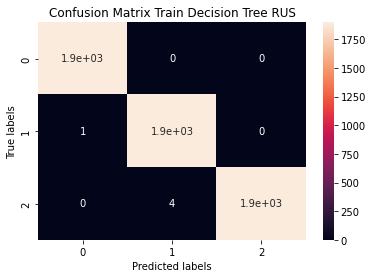

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1898
           1       1.00      1.00      1.00      1898
           2       1.00      1.00      1.00      1898

    accuracy                           1.00      5694
   macro avg       1.00      1.00      1.00      5694
weighted avg       1.00      1.00      1.00      5694

--------------Test data ---------------

Confusion matrix 

[[5585 3058 2345]
 [ 660  751  797]
 [ 116  147  212]]


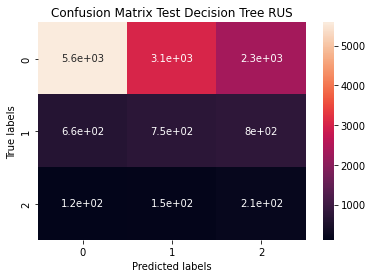

              precision    recall  f1-score   support

           0       0.88      0.51      0.64     10988
           1       0.19      0.34      0.24      2208
           2       0.06      0.45      0.11       475

    accuracy                           0.48     13671
   macro avg       0.38      0.43      0.33     13671
weighted avg       0.74      0.48      0.56     13671



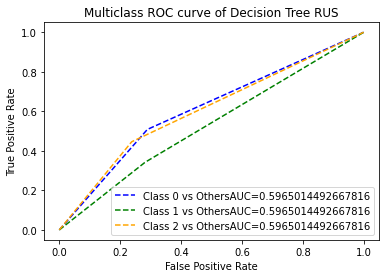

----- Evaluation on SMOTE data -------Decision Tree SMOTE-----
--------------- Train Data ------------

Confusion matrix 

[[43953     0     0]
 [   46 43907     0]
 [   17    14 43922]]


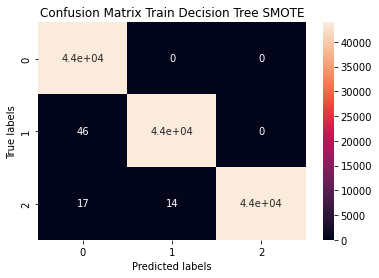

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     43953
           1       1.00      1.00      1.00     43953
           2       1.00      1.00      1.00     43953

    accuracy                           1.00    131859
   macro avg       1.00      1.00      1.00    131859
weighted avg       1.00      1.00      1.00    131859

---------------Test data ---------------

Confusion matrix 

[[8807 1720  461]
 [1254  694  260]
 [ 253  163   59]]


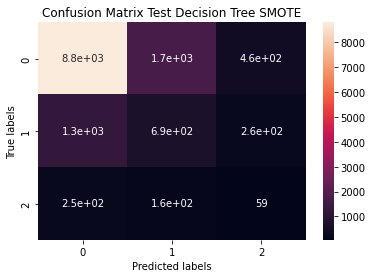

              precision    recall  f1-score   support

           0       0.85      0.80      0.83     10988
           1       0.27      0.31      0.29      2208
           2       0.08      0.12      0.09       475

    accuracy                           0.70     13671
   macro avg       0.40      0.41      0.40     13671
weighted avg       0.73      0.70      0.71     13671



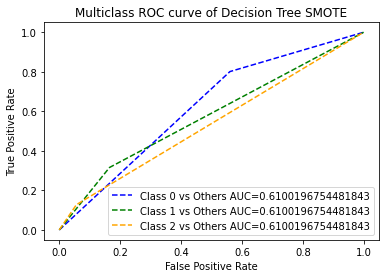

----- Evaluation on SMOTE data -------Decision Tree SMOTETomek-----
--------------- Train Data ------------

Confusion matrix 

[[42074     0     0]
 [   46 42245     0]
 [   17    14 43141]]


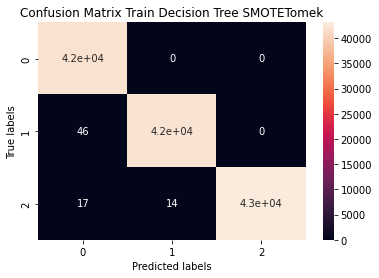

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42074
           1       1.00      1.00      1.00     42291
           2       1.00      1.00      1.00     43172

    accuracy                           1.00    127537
   macro avg       1.00      1.00      1.00    127537
weighted avg       1.00      1.00      1.00    127537

---------------Test data ---------------

Confusion matrix 

[[8791 1743  454]
 [1292  648  268]
 [ 255  163   57]]


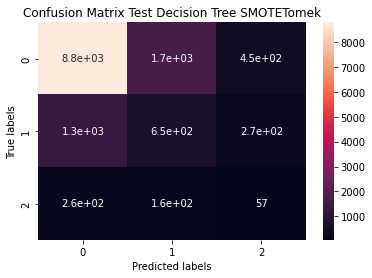

              precision    recall  f1-score   support

           0       0.85      0.80      0.82     10988
           1       0.25      0.29      0.27      2208
           2       0.07      0.12      0.09       475

    accuracy                           0.69     13671
   macro avg       0.39      0.40      0.40     13671
weighted avg       0.73      0.69      0.71     13671



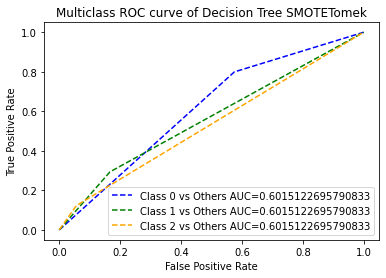

[{'Model_Name': 'Decision Tree RUS',
  'Test_AUC': 0.5965014492667816,
  'Test_Accuracy': 0.4789700826567186,
  'Test_F1score': 0.5606872157218041,
  'Test_Precision': 0.7385504493944358,
  'Test_Recall': 0.4789700826567186,
  'Train_AUC': 0.999999028426573,
  'Train_Accuracy': 0.9991218826835265,
  'Train_F1score': 0.9991218820129968,
  'Train_Precision': 0.999123083782941,
  'Train_Recall': 0.9991218826835265},
 {'Model_Name': 'Decision Tree SMOTE',
  'Test_AUC': 0.6100196754481843,
  'Test_Accuracy': 0.6992904688757223,
  'Test_F1score': 0.7147098449783307,
  'Test_Precision': 0.7324318816818295,
  'Test_Recall': 0.6992904688757223,
  'Train_AUC': 0.9999996320483633,
  'Train_Accuracy': 0.9994160428943037,
  'Train_F1score': 0.9994160896590741,
  'Train_Precision': 0.9994166493877829,
  'Train_Recall': 0.9994160428943037},
 {'Model_Name': 'Decision Tree SMOTETomek',
  'Test_AUC': 0.6015122695790833,
  'Test_Accuracy': 0.6946090264062614,
  'Test_F1score': 0.709753636636227,
  'Test_

In [ ]:
dt_eval_list = model_evaluation('Decision Tree RUS', 'Decision Tree SMOTE','Decision Tree SMOTETomek', dt_rus, dt_smote, dt_smotom,x_train_rus, y_train_rus,
                                x_train_smote, y_train_smote, x_train_smotom,y_train_smotom,X_test, y_test)
dt_eval_list

In [ ]:
#adding list
add_list_to_final_df(dt_eval_list)
#Taking a look of our final comparison dataframe
comparison_df

Model_Name  Train_Accuracy  ...  Test_F1score  Test_AUC
0           LogisticReg RUS        0.541974  ...      0.679839  0.762724
1         LogisticReg SMOTE        0.534806  ...      0.681386  0.765175
2    LogisticReg SMOTETomek        0.539820  ...      0.680234  0.765693
3         Decision Tree RUS        0.999122  ...      0.560687  0.596501
4       Decision Tree SMOTE        0.999416  ...      0.714710  0.610020
5  Decision Tree SMOTETomek        0.999396  ...      0.709754  0.601512

[6 rows x 11 columns]

##**Observation:** Clearly Decision Tree models are overfitting. in all the datasets, whether undersampled or oversampled with SMOTE and SMOTETomek are working really well on train data but not on test data.

##**Random Forest Model:**
###To prevent overfitting, we will be building random forest model. Random forest builds multiple decision trees and merges them together to get a more accurate and stable prediction. The ensemble models with only one tree will overfit to data as well because it is the same as a single decision tree. When we add trees to the Random Forest then the tendency to overfitting decreases.

In [ ]:
#RUS
rf_rus = RandomForestClassifier(random_state=42, max_depth=5, n_estimators=100, oob_score=True)
rf_rus.fit(x_train_rus,y_train_rus)

RandomForestClassifier(max_depth=5, oob_score=True, random_state=42)

In [ ]:
#SMOTE
rf_smote = RandomForestClassifier(random_state=42, max_depth=5, n_estimators=100, oob_score=True)
rf_smote.fit(x_train_smote,y_train_smote)

RandomForestClassifier(max_depth=5, oob_score=True, random_state=42)

In [ ]:
#SMOTE
rf_smotom = RandomForestClassifier(random_state=42, max_depth=5, n_estimators=100, oob_score=True)
rf_smotom.fit(x_train_smotom,y_train_smotom)

RandomForestClassifier(max_depth=5, oob_score=True, random_state=42)

----- Evaluation on Random Undersampled data -----Random Forest RUS------
--------------- Train Data ------------

Confusion matrix 

[[1383  187  328]
 [ 543  505  850]
 [ 301  266 1331]]


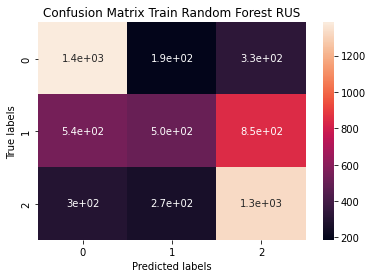

              precision    recall  f1-score   support

           0       0.62      0.73      0.67      1898
           1       0.53      0.27      0.35      1898
           2       0.53      0.70      0.60      1898

    accuracy                           0.57      5694
   macro avg       0.56      0.57      0.54      5694
weighted avg       0.56      0.57      0.54      5694

--------------Test data ---------------

Confusion matrix 

[[7785 1351 1852]
 [ 685  484 1039]
 [  91   67  317]]


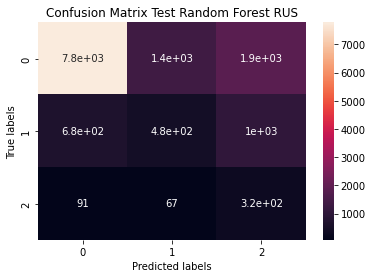

              precision    recall  f1-score   support

           0       0.91      0.71      0.80     10988
           1       0.25      0.22      0.24      2208
           2       0.10      0.67      0.17       475

    accuracy                           0.63     13671
   macro avg       0.42      0.53      0.40     13671
weighted avg       0.78      0.63      0.68     13671



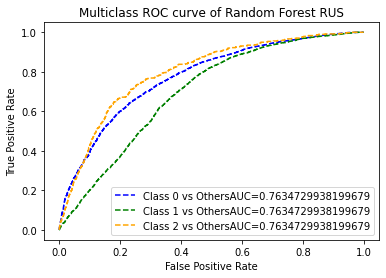

----- Evaluation on SMOTE data -------Random Forest SMOTE-----
--------------- Train Data ------------

Confusion matrix 

[[33910  4553  5490]
 [14941  9913 19099]
 [ 7343  6650 29960]]


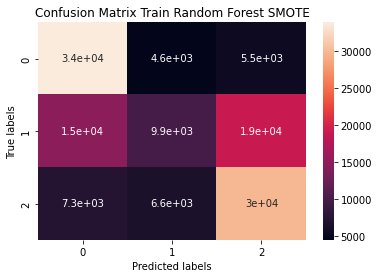

              precision    recall  f1-score   support

           0       0.60      0.77      0.68     43953
           1       0.47      0.23      0.30     43953
           2       0.55      0.68      0.61     43953

    accuracy                           0.56    131859
   macro avg       0.54      0.56      0.53    131859
weighted avg       0.54      0.56      0.53    131859

---------------Test data ---------------

Confusion matrix 

[[8574 1070 1344]
 [ 886  471  851]
 [ 113   78  284]]


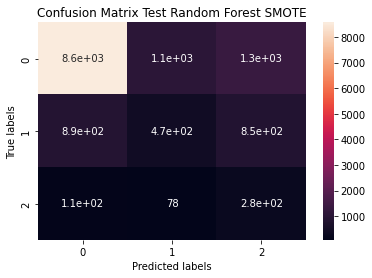

              precision    recall  f1-score   support

           0       0.90      0.78      0.83     10988
           1       0.29      0.21      0.25      2208
           2       0.11      0.60      0.19       475

    accuracy                           0.68     13671
   macro avg       0.43      0.53      0.42     13671
weighted avg       0.77      0.68      0.72     13671



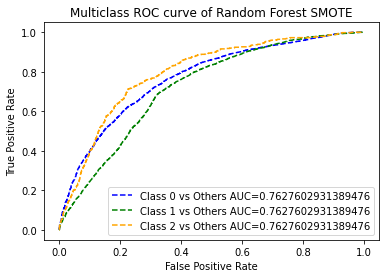

----- Evaluation on SMOTE data -------Random Forest SMOTETomek-----
--------------- Train Data ------------

Confusion matrix 

[[32451  4474  5149]
 [13584 10002 18705]
 [ 7167  6403 29602]]


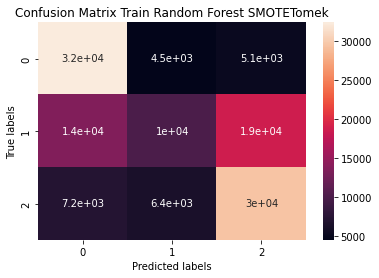

              precision    recall  f1-score   support

           0       0.61      0.77      0.68     42074
           1       0.48      0.24      0.32     42291
           2       0.55      0.69      0.61     43172

    accuracy                           0.56    127537
   macro avg       0.55      0.56      0.54    127537
weighted avg       0.55      0.56      0.54    127537

---------------Test data ---------------

Confusion matrix 

[[8503 1117 1368]
 [ 872  464  872]
 [ 113   74  288]]


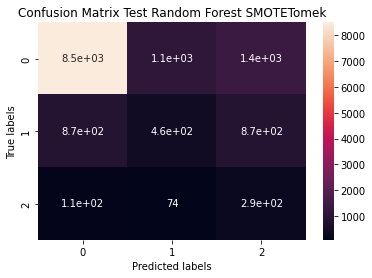

              precision    recall  f1-score   support

           0       0.90      0.77      0.83     10988
           1       0.28      0.21      0.24      2208
           2       0.11      0.61      0.19       475

    accuracy                           0.68     13671
   macro avg       0.43      0.53      0.42     13671
weighted avg       0.77      0.68      0.71     13671



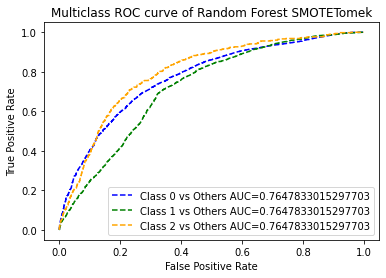

[{'Model_Name': 'Random Forest RUS',
  'Test_AUC': 0.7634729938199679,
  'Test_Accuracy': 0.6280447662936142,
  'Test_F1score': 0.6841713877588803,
  'Test_Precision': 0.7754233629597981,
  'Test_Recall': 0.6280447662936142,
  'Train_AUC': 0.7537853426026989,
  'Train_Accuracy': 0.565331928345627,
  'Train_F1score': 0.5427419799819592,
  'Train_Precision': 0.5595483093444947,
  'Train_Recall': 0.565331928345627},
 {'Model_Name': 'Random Forest SMOTE',
  'Test_AUC': 0.7627602931389476,
  'Test_Accuracy': 0.6823933874625119,
  'Test_F1score': 0.7167641767416316,
  'Test_Precision': 0.7708364736358425,
  'Test_Recall': 0.6823933874625119,
  'Train_AUC': 0.7579598802848567,
  'Train_Accuracy': 0.5595598328517584,
  'Train_F1score': 0.5300696577813323,
  'Train_Precision': 0.5407102054854808,
  'Train_Recall': 0.5595598328517584},
 {'Model_Name': 'Random Forest SMOTETomek',
  'Test_AUC': 0.7647833015297703,
  'Test_Accuracy': 0.6769804696071977,
  'Test_F1score': 0.7130006480059532,
  'Test

In [ ]:
#Random Forest Evaluation
rf_eval_list = model_evaluation('Random Forest RUS', 'Random Forest SMOTE','Random Forest SMOTETomek', rf_rus, rf_smote,rf_smotom, x_train_rus, y_train_rus,
                                x_train_smote, y_train_smote,x_train_smotom,y_train_smotom, X_test, y_test)
rf_eval_list

In [ ]:
#adding list
add_list_to_final_df(rf_eval_list)
#Taking a look of our final comparison dataframe
comparison_df

Model_Name  Train_Accuracy  ...  Test_F1score  Test_AUC
0           LogisticReg RUS        0.541974  ...      0.679839  0.762724
1         LogisticReg SMOTE        0.534806  ...      0.681386  0.765175
2    LogisticReg SMOTETomek        0.539820  ...      0.680234  0.765693
3         Decision Tree RUS        0.999122  ...      0.560687  0.596501
4       Decision Tree SMOTE        0.999416  ...      0.714710  0.610020
5  Decision Tree SMOTETomek        0.999396  ...      0.709754  0.601512
6         Random Forest RUS        0.565332  ...      0.684171  0.763473
7       Random Forest SMOTE        0.559560  ...      0.716764  0.762760
8  Random Forest SMOTETomek        0.564973  ...      0.713001  0.764783

[9 rows x 11 columns]

##**Random Forest Hyperparameter Tuning:**

In [ ]:
#classifier
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [ ]:
#Parameter dictionary
params = {'max_depth': [3,5,10,20],'min_samples_leaf': [5,10,20,50,100],'n_estimators': [10,25,30,50,100,200]}

In [ ]:
#Grid Search to get the best parameters
grid_search = GridSearchCV(estimator=rf, param_grid=params, cv = 4, n_jobs=-1, verbose=1, scoring="f1_weighted")

In [ ]:
#Fitting RUS to grid search
grid_search.fit(x_train_rus,y_train_rus)

Fitting 4 folds for each of 120 candidates, totalling 480 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='f1_weighted', verbose=1)

In [ ]:
#optimal model
rf_tuned_rus = grid_search.best_estimator_

In [ ]:
#Fitting SMOTE
grid_search_smote = GridSearchCV(estimator=rf, param_grid=params, cv = 4, n_jobs=-1, verbose=1, scoring="f1_weighted")
grid_search_smote.fit(x_train_smote,y_train_smote)
#optimal smote model
rf_tuned_smote = grid_search_smote.best_estimator_

Fitting 4 folds for each of 120 candidates, totalling 480 fits


In [ ]:
#Fitting SMOTETomek
grid_search_smotom = GridSearchCV(estimator=rf, param_grid=params, cv = 4, n_jobs=-1, verbose=1, scoring="f1_weighted")
grid_search_smotom.fit(x_train_smotom,y_train_smotom)
#optimal SMOTETomek model
rf_tuned_smotom = grid_search_smotom.best_estimator_

Fitting 4 folds for each of 120 candidates, totalling 480 fits


----- Evaluation on Random Undersampled data -----RandomF Tuned RUS------
--------------- Train Data ------------

Confusion matrix 

[[1491  164  243]
 [ 290 1259  349]
 [ 234  173 1491]]


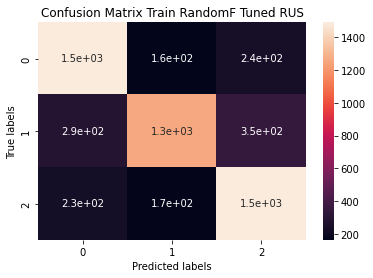

              precision    recall  f1-score   support

           0       0.74      0.79      0.76      1898
           1       0.79      0.66      0.72      1898
           2       0.72      0.79      0.75      1898

    accuracy                           0.74      5694
   macro avg       0.75      0.74      0.74      5694
weighted avg       0.75      0.74      0.74      5694

--------------Test data ---------------

Confusion matrix 

[[7438 1968 1582]
 [ 604  684  920]
 [  77  115  283]]


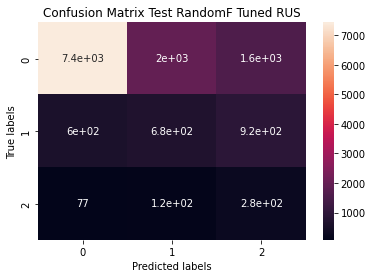

              precision    recall  f1-score   support

           0       0.92      0.68      0.78     10988
           1       0.25      0.31      0.27      2208
           2       0.10      0.60      0.17       475

    accuracy                           0.61     13671
   macro avg       0.42      0.53      0.41     13671
weighted avg       0.78      0.61      0.68     13671



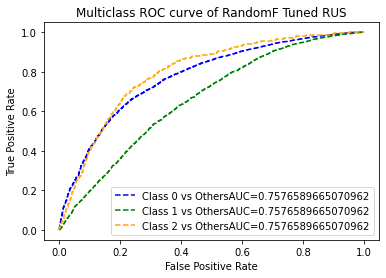

----- Evaluation on SMOTE data -------RandomF Tuned SMOTE-----
--------------- Train Data ------------

Confusion matrix 

[[39978  2968  1007]
 [ 3552 37336  3065]
 [  780   836 42337]]


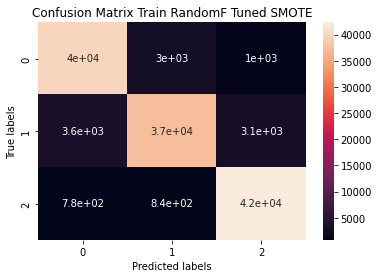

              precision    recall  f1-score   support

           0       0.90      0.91      0.91     43953
           1       0.91      0.85      0.88     43953
           2       0.91      0.96      0.94     43953

    accuracy                           0.91    131859
   macro avg       0.91      0.91      0.91    131859
weighted avg       0.91      0.91      0.91    131859

---------------Test data ---------------

Confusion matrix 

[[9323 1265  400]
 [1181  740  287]
 [ 195  202   78]]


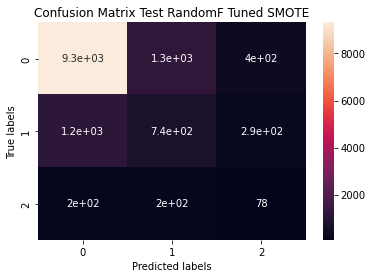

              precision    recall  f1-score   support

           0       0.87      0.85      0.86     10988
           1       0.34      0.34      0.34      2208
           2       0.10      0.16      0.13       475

    accuracy                           0.74     13671
   macro avg       0.44      0.45      0.44     13671
weighted avg       0.76      0.74      0.75     13671



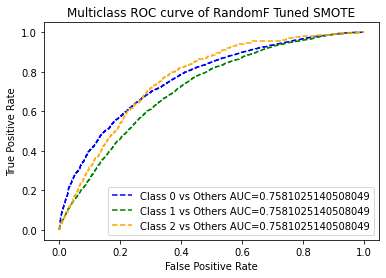

----- Evaluation on SMOTE data -------RandomF Tuned SMOTETomek-----
--------------- Train Data ------------

Confusion matrix 

[[38209  2901   964]
 [ 3233 36044  3014]
 [  691   795 41686]]


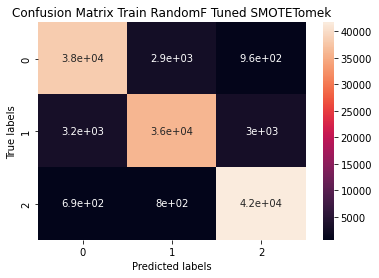

              precision    recall  f1-score   support

           0       0.91      0.91      0.91     42074
           1       0.91      0.85      0.88     42291
           2       0.91      0.97      0.94     43172

    accuracy                           0.91    127537
   macro avg       0.91      0.91      0.91    127537
weighted avg       0.91      0.91      0.91    127537

---------------Test data ---------------

Confusion matrix 

[[9228 1339  421]
 [1127  794  287]
 [ 190  201   84]]


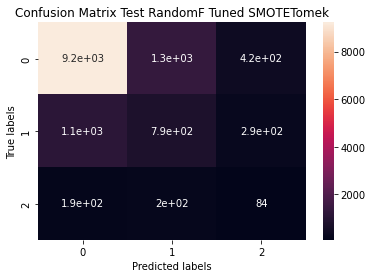

              precision    recall  f1-score   support

           0       0.88      0.84      0.86     10988
           1       0.34      0.36      0.35      2208
           2       0.11      0.18      0.13       475

    accuracy                           0.74     13671
   macro avg       0.44      0.46      0.45     13671
weighted avg       0.76      0.74      0.75     13671



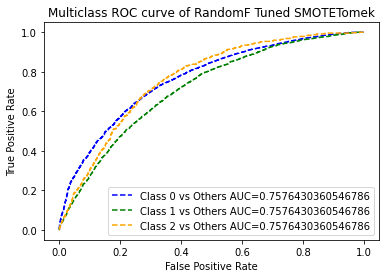

[{'Model_Name': 'RandomF Tuned RUS',
  'Test_AUC': 0.7576589665070962,
  'Test_Accuracy': 0.6148050618096701,
  'Test_F1score': 0.6762096575189265,
  'Test_Precision': 0.779784883659752,
  'Test_Recall': 0.6148050618096701,
  'Train_AUC': 0.9134095361504893,
  'Train_Accuracy': 0.7448191078328065,
  'Train_F1score': 0.743932385070194,
  'Train_Precision': 0.748197339042421,
  'Train_Recall': 0.7448191078328065},
 {'Model_Name': 'RandomF Tuned SMOTE',
  'Test_AUC': 0.7581025140508049,
  'Test_Accuracy': 0.7417891887937971,
  'Test_F1score': 0.7495547918500519,
  'Test_Precision': 0.758071709153893,
  'Test_Recall': 0.7417891887937971,
  'Train_AUC': 0.983719257392943,
  'Train_Accuracy': 0.9074162552423422,
  'Train_F1score': 0.9068235769528544,
  'Train_Precision': 0.9073426340970177,
  'Train_Recall': 0.9074162552423422},
 {'Model_Name': 'RandomF Tuned SMOTETomek',
  'Test_AUC': 0.7576430360546786,
  'Test_Accuracy': 0.7392290249433107,
  'Test_F1score': 0.7499674735689108,
  'Test_Pr

In [ ]:
#Model Evaluation for Random Forest Hyperparameter Tuned
rf_tuned_list = model_evaluation('RandomF Tuned RUS', 'RandomF Tuned SMOTE','RandomF Tuned SMOTETomek',rf_tuned_rus, rf_tuned_smote,rf_tuned_smotom,x_train_rus, y_train_rus,
                                 x_train_smote, y_train_smote,x_train_smotom,y_train_smotom, X_test, y_test)
rf_tuned_list

In [ ]:
#adding list
add_list_to_final_df(rf_tuned_list)
#Taking a look of our final comparison dataframe
comparison_df

Model_Name  Train_Accuracy  ...  Test_F1score  Test_AUC
0            LogisticReg RUS        0.541974  ...      0.679839  0.762724
1          LogisticReg SMOTE        0.534806  ...      0.681386  0.765175
2     LogisticReg SMOTETomek        0.539820  ...      0.680234  0.765693
3          Decision Tree RUS        0.999122  ...      0.560687  0.596501
4        Decision Tree SMOTE        0.999416  ...      0.714710  0.610020
5   Decision Tree SMOTETomek        0.999396  ...      0.709754  0.601512
6          Random Forest RUS        0.565332  ...      0.684171  0.763473
7        Random Forest SMOTE        0.559560  ...      0.716764  0.762760
8   Random Forest SMOTETomek        0.564973  ...      0.713001  0.764783
9          RandomF Tuned RUS        0.744819  ...      0.676210  0.757659
10       RandomF Tuned SMOTE        0.907416  ...      0.749555  0.758103
11  RandomF Tuned SMOTETomek        0.909062  ...      0.749967  0.757643

[12 rows x 11 columns]

##**Random Forest HyperParameter Tuned Feature Importance:**

In [ ]:
#feature importance by random forest 
feature_imp = pd.DataFrame({"Variable": x_train_smote.columns,"Importance": rf_tuned_smote.feature_importances_})
feature_imp.sort_values(by="Importance", ascending=False, inplace = True)

In [ ]:
feature_imp

Variable  Importance
1    Total_Past_Communications    0.246041
2                   Word_Count    0.212023
0        Subject_Hotness_Score    0.203825
3              Total_Img_links    0.182409
7        Email_Campaign_Type_2    0.051569
8        Email_Campaign_Type_3    0.028550
4                 Email_Type_1    0.019077
5          Email_Source_Type_1    0.017358
6        Email_Campaign_Type_1    0.011941
10  Time_Email_sent_Category_2    0.009448
9   Time_Email_sent_Category_1    0.009036
11  Time_Email_sent_Category_3    0.008724

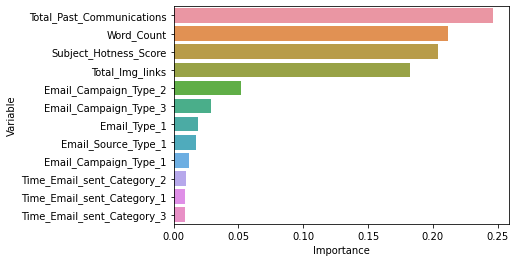

In [ ]:
#visualisation
sns.barplot(x=feature_imp['Importance'],y= feature_imp['Variable'])

## From above plot we can see that Total_Past_Communications	feature is having higher feature importances compared to others

##**KNN Classification Model:**
##The KNN algorithm assumes that similar things exist in close proximity. In other words, similar things are near to each other. KNN uses the concept of similarity in terms of distance.

In [ ]:
#RUS fitting
knn_rus = KNeighborsClassifier()
knn_rus.fit(x_train_rus,y_train_rus)

KNeighborsClassifier()

In [ ]:
#SMOTE fitting
knn_smote = KNeighborsClassifier()
knn_smote.fit(x_train_smote,y_train_smote)

KNeighborsClassifier()

In [ ]:
#SMOTETomek fitting
knn_smotom = KNeighborsClassifier()
knn_smotom.fit(x_train_smotom,y_train_smotom)

KNeighborsClassifier()

----- Evaluation on Random Undersampled data -----KNN RUS------
--------------- Train Data ------------

Confusion matrix 

[[1459  282  157]
 [ 456 1124  318]
 [ 300  469 1129]]


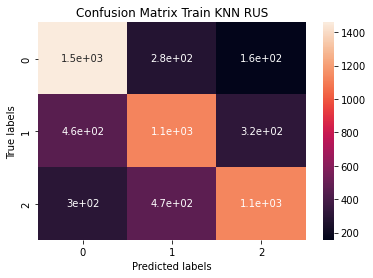

              precision    recall  f1-score   support

           0       0.66      0.77      0.71      1898
           1       0.60      0.59      0.60      1898
           2       0.70      0.59      0.64      1898

    accuracy                           0.65      5694
   macro avg       0.65      0.65      0.65      5694
weighted avg       0.65      0.65      0.65      5694

--------------Test data ---------------

Confusion matrix 

[[7013 2672 1303]
 [ 695  814  699]
 [ 114  179  182]]


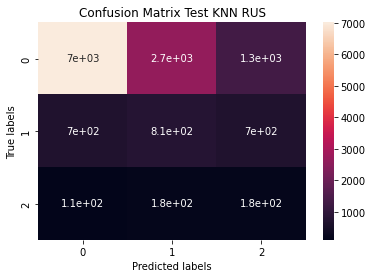

              precision    recall  f1-score   support

           0       0.90      0.64      0.75     10988
           1       0.22      0.37      0.28      2208
           2       0.08      0.38      0.14       475

    accuracy                           0.59     13671
   macro avg       0.40      0.46      0.39     13671
weighted avg       0.76      0.59      0.65     13671



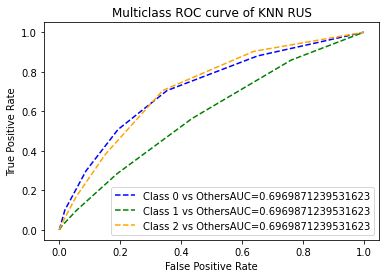

----- Evaluation on SMOTE data -------KNN SMOTE-----
--------------- Train Data ------------

Confusion matrix 

[[32148  8222  3583]
 [ 1114 41529  1310]
 [  440   970 42543]]


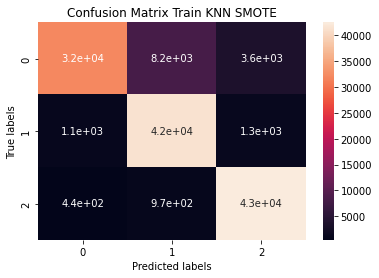

              precision    recall  f1-score   support

           0       0.95      0.73      0.83     43953
           1       0.82      0.94      0.88     43953
           2       0.90      0.97      0.93     43953

    accuracy                           0.88    131859
   macro avg       0.89      0.88      0.88    131859
weighted avg       0.89      0.88      0.88    131859

---------------Test data ---------------

Confusion matrix 

[[7153 2697 1138]
 [ 780  921  507]
 [ 146  191  138]]


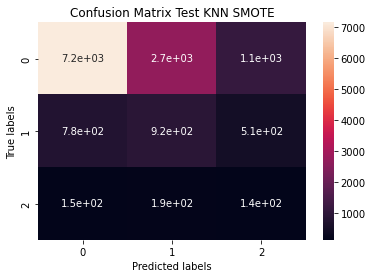

              precision    recall  f1-score   support

           0       0.89      0.65      0.75     10988
           1       0.24      0.42      0.31      2208
           2       0.08      0.29      0.12       475

    accuracy                           0.60     13671
   macro avg       0.40      0.45      0.39     13671
weighted avg       0.75      0.60      0.66     13671



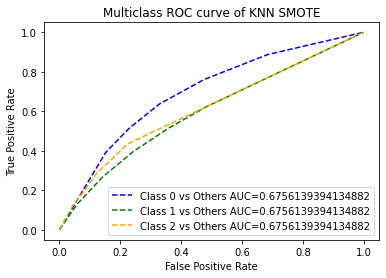

----- Evaluation on SMOTE data -------KNN SMOTETomek-----
--------------- Train Data ------------

Confusion matrix 

[[31311  7439  3324]
 [  804 40278  1209]
 [  271   844 42057]]


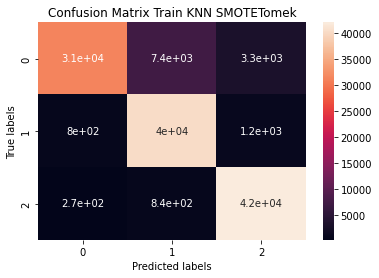

              precision    recall  f1-score   support

           0       0.97      0.74      0.84     42074
           1       0.83      0.95      0.89     42291
           2       0.90      0.97      0.94     43172

    accuracy                           0.89    127537
   macro avg       0.90      0.89      0.89    127537
weighted avg       0.90      0.89      0.89    127537

---------------Test data ---------------

Confusion matrix 

[[7067 2733 1188]
 [ 769  921  518]
 [ 142  200  133]]


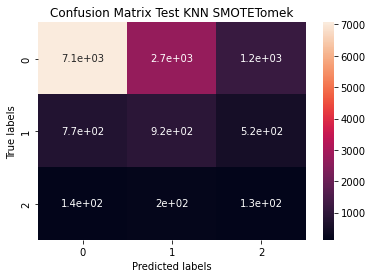

              precision    recall  f1-score   support

           0       0.89      0.64      0.75     10988
           1       0.24      0.42      0.30      2208
           2       0.07      0.28      0.11       475

    accuracy                           0.59     13671
   macro avg       0.40      0.45      0.39     13671
weighted avg       0.75      0.59      0.65     13671



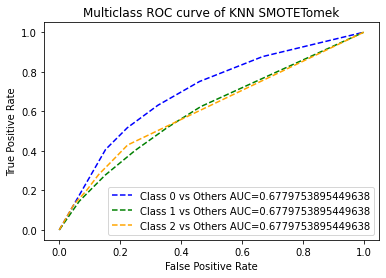

[{'Model_Name': 'KNN RUS',
  'Test_AUC': 0.6969871239531623,
  'Test_Accuracy': 0.5858386365298808,
  'Test_F1score': 0.6488534031454426,
  'Test_Precision': 0.7593837163363701,
  'Test_Recall': 0.5858386365298807,
  'Train_AUC': 0.8419226901443222,
  'Train_Accuracy': 0.6519142957499122,
  'Train_F1score': 0.6500148607378106,
  'Train_Precision': 0.6540075827486713,
  'Train_Recall': 0.6519142957499122},
 {'Model_Name': 'KNN SMOTE',
  'Test_AUC': 0.6756139394134882,
  'Test_Accuracy': 0.6006875868627021,
  'Test_F1score': 0.6567416206185124,
  'Test_Precision': 0.7533629364440334,
  'Test_Recall': 0.6006875868627021,
  'Train_AUC': 0.9836248639945715,
  'Train_Accuracy': 0.8813960366755398,
  'Train_F1score': 0.8787687442596624,
  'Train_Precision': 0.8898379197741234,
  'Train_Recall': 0.8813960366755398},
 {'Model_Name': 'KNN SMOTETomek',
  'Test_AUC': 0.6779753895449638,
  'Test_Accuracy': 0.5940311608514374,
  'Test_F1score': 0.6520440453637787,
  'Test_Precision': 0.7530755051557

In [ ]:
#model eval of knn
knn_eval_list = model_evaluation('KNN RUS','KNN SMOTE','KNN SMOTETomek',knn_rus,knn_smote,knn_smotom,x_train_rus, y_train_rus,
                                x_train_smote, y_train_smote, x_train_smotom,y_train_smotom, X_test, y_test)
knn_eval_list

In [ ]:
#adding list
add_list_to_final_df(knn_eval_list)
#Taking a look of our final comparison dataframe
comparison_df

Model_Name  Train_Accuracy  ...  Test_F1score  Test_AUC
0            LogisticReg RUS        0.541974  ...      0.679839  0.762724
1          LogisticReg SMOTE        0.534806  ...      0.681386  0.765175
2     LogisticReg SMOTETomek        0.539820  ...      0.680234  0.765693
3          Decision Tree RUS        0.999122  ...      0.560687  0.596501
4        Decision Tree SMOTE        0.999416  ...      0.714710  0.610020
5   Decision Tree SMOTETomek        0.999396  ...      0.709754  0.601512
6          Random Forest RUS        0.565332  ...      0.684171  0.763473
7        Random Forest SMOTE        0.559560  ...      0.716764  0.762760
8   Random Forest SMOTETomek        0.564973  ...      0.713001  0.764783
9          RandomF Tuned RUS        0.744819  ...      0.676210  0.757659
10       RandomF Tuned SMOTE        0.907416  ...      0.749555  0.758103
11  RandomF Tuned SMOTETomek        0.909062  ...      0.749967  0.757643
12                   KNN RUS        0.651914  ...      0.648853  0.696987
13                 KNN SMOTE        0.881396  ...      0.656742  0.675614
14            KNN SMOTETomek        0.891083  ...      0.652044  0.677975

[15 rows x 11 columns]

In [ ]:
#knn tuning rus
knn_rus = KNeighborsClassifier()
params = [{'n_neighbors': range(5,10),'metric': ['canberra', 'euclidean', 'minkowski']}]
knn_rus_search = GridSearchCV(knn_rus, cv = 10, param_grid = params, scoring = "f1_weighted")
knn_rus_search.fit(x_train_rus,y_train_rus)
knn_rus_tuned = knn_rus_search.best_estimator_

#knn tuning smote
knn_smote = KNeighborsClassifier()
knn_smote_search = GridSearchCV(knn_smote, cv = 10, param_grid = params, scoring = "f1_weighted")
knn_smote_search.fit(x_train_smote,y_train_smote)
knn_smote_tuned = knn_smote_search.best_estimator_

#knn tuning SMOTETomek
knn_smotom = KNeighborsClassifier()
knn_smotom_search = GridSearchCV(knn_smotom, cv = 10, param_grid = params, scoring = "f1_weighted")
knn_smotom_search.fit(x_train_smotom,y_train_smotom)
knn_smotom_tuned = knn_smotom_search.best_estimator_

----- Evaluation on Random Undersampled data -----KNN Tuned RUS------
--------------- Train Data ------------

Confusion matrix 

[[1358  317  223]
 [ 424 1063  411]
 [ 277  487 1134]]


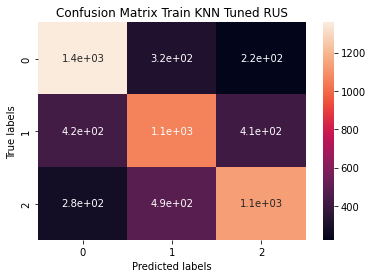

              precision    recall  f1-score   support

           0       0.66      0.72      0.69      1898
           1       0.57      0.56      0.56      1898
           2       0.64      0.60      0.62      1898

    accuracy                           0.62      5694
   macro avg       0.62      0.62      0.62      5694
weighted avg       0.62      0.62      0.62      5694

--------------Test data ---------------

Confusion matrix 

[[6868 2586 1534]
 [ 610  810  788]
 [  86  165  224]]


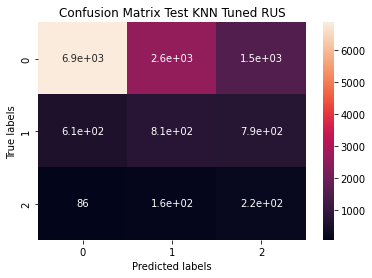

              precision    recall  f1-score   support

           0       0.91      0.63      0.74     10988
           1       0.23      0.37      0.28      2208
           2       0.09      0.47      0.15       475

    accuracy                           0.58     13671
   macro avg       0.41      0.49      0.39     13671
weighted avg       0.77      0.58      0.65     13671



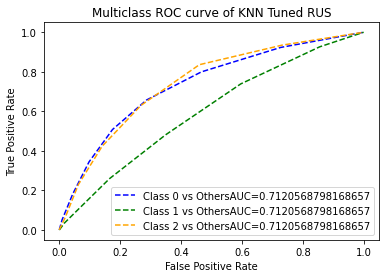

----- Evaluation on SMOTE data -------KNN Tuned SMOTE-----
--------------- Train Data ------------

Confusion matrix 

[[33574  6799  3580]
 [ 2166 40574  1213]
 [  651  1425 41877]]


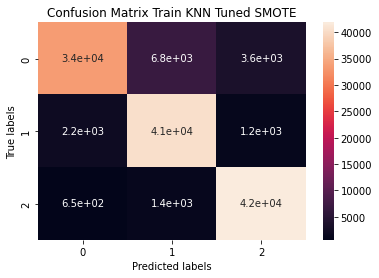

              precision    recall  f1-score   support

           0       0.92      0.76      0.84     43953
           1       0.83      0.92      0.87     43953
           2       0.90      0.95      0.92     43953

    accuracy                           0.88    131859
   macro avg       0.88      0.88      0.88    131859
weighted avg       0.88      0.88      0.88    131859

---------------Test data ---------------

Confusion matrix 

[[7561 2315 1112]
 [ 861  848  499]
 [ 164  180  131]]


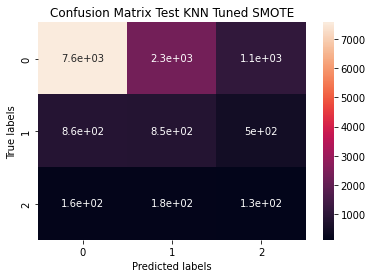

              precision    recall  f1-score   support

           0       0.88      0.69      0.77     10988
           1       0.25      0.38      0.31      2208
           2       0.08      0.28      0.12       475

    accuracy                           0.62     13671
   macro avg       0.40      0.45      0.40     13671
weighted avg       0.75      0.62      0.67     13671



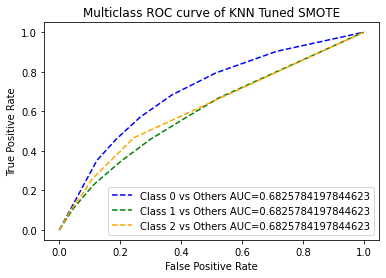

----- Evaluation on SMOTE data -------KNN Tuned SMOTETomek-----
--------------- Train Data ------------

Confusion matrix 

[[31311  7439  3324]
 [  804 40278  1209]
 [  271   844 42057]]


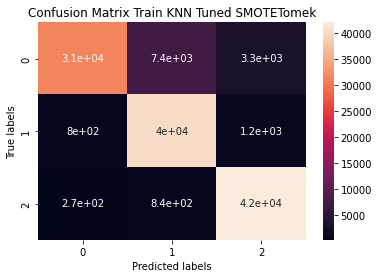

              precision    recall  f1-score   support

           0       0.97      0.74      0.84     42074
           1       0.83      0.95      0.89     42291
           2       0.90      0.97      0.94     43172

    accuracy                           0.89    127537
   macro avg       0.90      0.89      0.89    127537
weighted avg       0.90      0.89      0.89    127537

---------------Test data ---------------

Confusion matrix 

[[7067 2733 1188]
 [ 769  921  518]
 [ 142  200  133]]


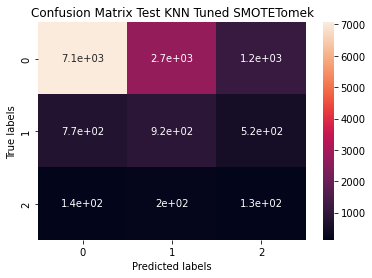

              precision    recall  f1-score   support

           0       0.89      0.64      0.75     10988
           1       0.24      0.42      0.30      2208
           2       0.07      0.28      0.11       475

    accuracy                           0.59     13671
   macro avg       0.40      0.45      0.39     13671
weighted avg       0.75      0.59      0.65     13671



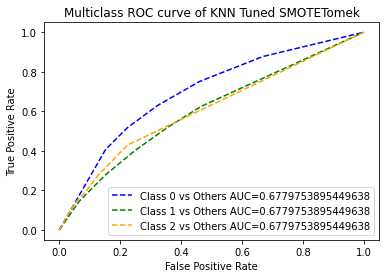

[{'Model_Name': 'KNN Tuned RUS',
  'Test_AUC': 0.7120568798168657,
  'Test_Accuracy': 0.5780118499012509,
  'Test_F1score': 0.645603496972498,
  'Test_Precision': 0.7695832996291636,
  'Test_Recall': 0.5780118499012509,
  'Train_AUC': 0.8181196963657232,
  'Train_Accuracy': 0.6243414120126449,
  'Train_F1score': 0.623237047408161,
  'Train_Precision': 0.6234362654846187,
  'Train_Recall': 0.6243414120126449},
 {'Model_Name': 'KNN Tuned SMOTE',
  'Test_AUC': 0.6825784197844623,
  'Test_Accuracy': 0.6246799795186891,
  'Test_F1score': 0.6743899429069942,
  'Test_Precision': 0.7513758820692853,
  'Test_Recall': 0.6246799795186891,
  'Train_AUC': 0.9790284203457833,
  'Train_Accuracy': 0.8799171842650103,
  'Train_F1score': 0.8782867772007575,
  'Train_Precision': 0.8837864820370464,
  'Train_Recall': 0.8799171842650103},
 {'Model_Name': 'KNN Tuned SMOTETomek',
  'Test_AUC': 0.6779753895449638,
  'Test_Accuracy': 0.5940311608514374,
  'Test_F1score': 0.6520440453637787,
  'Test_Precision':

In [ ]:
#knn tuned model evaluation
knn_tuned_eval_list = model_evaluation('KNN Tuned RUS', 'KNN Tuned SMOTE','KNN Tuned SMOTETomek', knn_rus_tuned, knn_smote_tuned,knn_smotom_tuned, x_train_rus, y_train_rus,
                                       x_train_smote, y_train_smote,x_train_smotom,y_train_smotom, X_test, y_test)
knn_tuned_eval_list

In [ ]:
#adding list
add_list_to_final_df(knn_tuned_eval_list)
#Taking a look of our final comparison dataframe
comparison_df

Model_Name  Train_Accuracy  ...  Test_F1score  Test_AUC
0            LogisticReg RUS        0.541974  ...      0.679839  0.762724
1          LogisticReg SMOTE        0.534806  ...      0.681386  0.765175
2     LogisticReg SMOTETomek        0.539820  ...      0.680234  0.765693
3          Decision Tree RUS        0.999122  ...      0.560687  0.596501
4        Decision Tree SMOTE        0.999416  ...      0.714710  0.610020
5   Decision Tree SMOTETomek        0.999396  ...      0.709754  0.601512
6          Random Forest RUS        0.565332  ...      0.684171  0.763473
7        Random Forest SMOTE        0.559560  ...      0.716764  0.762760
8   Random Forest SMOTETomek        0.564973  ...      0.713001  0.764783
9          RandomF Tuned RUS        0.744819  ...      0.676210  0.757659
10       RandomF Tuned SMOTE        0.907416  ...      0.749555  0.758103
11  RandomF Tuned SMOTETomek        0.909062  ...      0.749967  0.757643
12                   KNN RUS        0.651914  ...      0.648853  0.696987
13                 KNN SMOTE        0.881396  ...      0.656742  0.675614
14            KNN SMOTETomek        0.891083  ...      0.652044  0.677975
15             KNN Tuned RUS        0.624341  ...      0.645603  0.712057
16           KNN Tuned SMOTE        0.879917  ...      0.674390  0.682578
17      KNN Tuned SMOTETomek        0.891083  ...      0.652044  0.677975

[18 rows x 11 columns]

## We can see that after tuning the KNN model we can see that there is a slight improvement in Test_F1score and Test_AUC

#**XG Boost Model:**
##XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework. The two reasons to use XGBoost are also the two goals of the project:

* Execution Speed.
* Model Performance.

In [ ]:
#fitting rus
xgb_rus = XGBClassifier(n_estimators=100,max_depth=12,min_samples_leaf=20,min_samples_split=30)
xgb_rus.fit(x_train_rus,y_train_rus)

XGBClassifier(max_depth=12, min_samples_leaf=20, min_samples_split=30,
              objective='multi:softprob')

In [ ]:
#fitting smote
xgb_smote = XGBClassifier(n_estimators=100,max_depth=12,min_samples_leaf=20,min_samples_split=30)
xgb_smote.fit(x_train_smote,y_train_smote)

XGBClassifier(max_depth=12, min_samples_leaf=20, min_samples_split=30,
              objective='multi:softprob')

In [ ]:
#fitting SMOTETomek
xgb_smotom = XGBClassifier(n_estimators=100,max_depth=12,min_samples_leaf=20,min_samples_split=30)
xgb_smotom.fit(x_train_smotom,y_train_smotom)

XGBClassifier(max_depth=12, min_samples_leaf=20, min_samples_split=30,
              objective='multi:softprob')

----- Evaluation on Random Undersampled data -----XGB RUS------
--------------- Train Data ------------

Confusion matrix 

[[1883    2   13]
 [  16 1849   33]
 [   5    7 1886]]


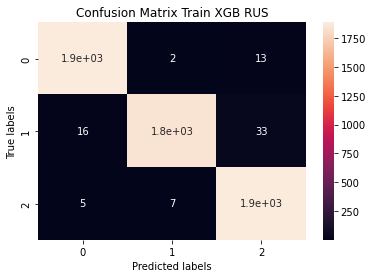

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1898
           1       1.00      0.97      0.98      1898
           2       0.98      0.99      0.98      1898

    accuracy                           0.99      5694
   macro avg       0.99      0.99      0.99      5694
weighted avg       0.99      0.99      0.99      5694

--------------Test data ---------------

Confusion matrix 

[[6779 2447 1762]
 [ 576  749  883]
 [  86  156  233]]


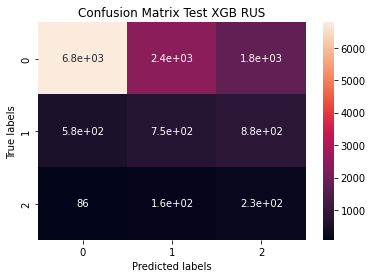

              precision    recall  f1-score   support

           0       0.91      0.62      0.74     10988
           1       0.22      0.34      0.27      2208
           2       0.08      0.49      0.14       475

    accuracy                           0.57     13671
   macro avg       0.41      0.48      0.38     13671
weighted avg       0.77      0.57      0.64     13671



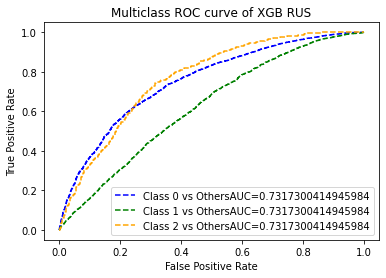

----- Evaluation on SMOTE data -------XGB SMOTE-----
--------------- Train Data ------------

Confusion matrix 

[[42808   834   311]
 [ 4101 35412  4440]
 [  764   859 42330]]


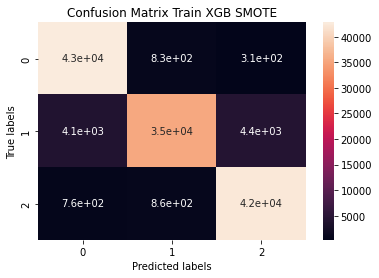

              precision    recall  f1-score   support

           0       0.90      0.97      0.93     43953
           1       0.95      0.81      0.87     43953
           2       0.90      0.96      0.93     43953

    accuracy                           0.91    131859
   macro avg       0.92      0.91      0.91    131859
weighted avg       0.92      0.91      0.91    131859

---------------Test data ---------------

Confusion matrix 

[[10226   629   133]
 [ 1572   482   154]
 [  301   133    41]]


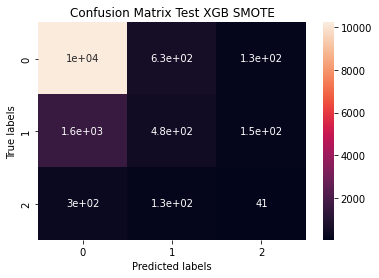

              precision    recall  f1-score   support

           0       0.85      0.93      0.89     10988
           1       0.39      0.22      0.28      2208
           2       0.12      0.09      0.10       475

    accuracy                           0.79     13671
   macro avg       0.45      0.41      0.42     13671
weighted avg       0.75      0.79      0.76     13671



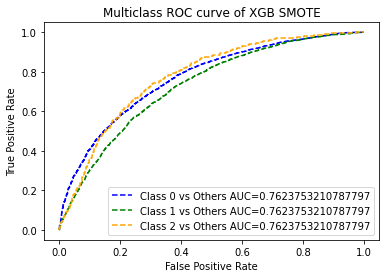

----- Evaluation on SMOTE data -------XGB SMOTETomek-----
--------------- Train Data ------------

Confusion matrix 

[[40960   881   233]
 [ 3852 34199  4240]
 [  697   740 41735]]


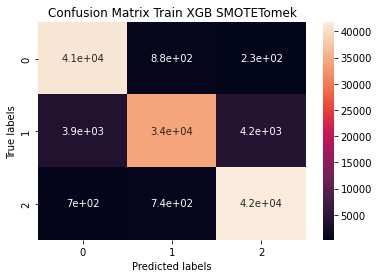

              precision    recall  f1-score   support

           0       0.90      0.97      0.94     42074
           1       0.95      0.81      0.88     42291
           2       0.90      0.97      0.93     43172

    accuracy                           0.92    127537
   macro avg       0.92      0.92      0.91    127537
weighted avg       0.92      0.92      0.92    127537

---------------Test data ---------------

Confusion matrix 

[[10206   652   130]
 [ 1528   505   175]
 [  285   155    35]]


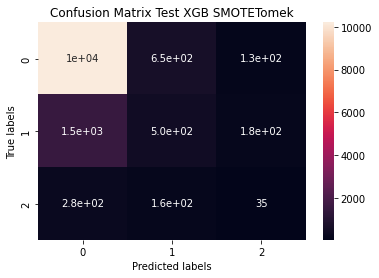

              precision    recall  f1-score   support

           0       0.85      0.93      0.89     10988
           1       0.38      0.23      0.29      2208
           2       0.10      0.07      0.09       475

    accuracy                           0.79     13671
   macro avg       0.45      0.41      0.42     13671
weighted avg       0.75      0.79      0.76     13671



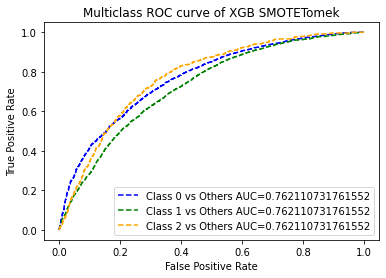

[{'Model_Name': 'XGB RUS',
  'Test_AUC': 0.7317300414945984,
  'Test_Accuracy': 0.5676980469607198,
  'Test_F1score': 0.6396494731848822,
  'Test_Precision': 0.7711408031941839,
  'Test_Recall': 0.5676980469607198,
  'Train_AUC': 0.9995195338076092,
  'Train_Accuracy': 0.9866526167896031,
  'Train_F1score': 0.986648578883858,
  'Train_Precision': 0.9867723820780556,
  'Train_Recall': 0.9866526167896031},
 {'Model_Name': 'XGB SMOTE',
  'Test_AUC': 0.7623753210787797,
  'Test_Accuracy': 0.7862628922536756,
  'Test_F1score': 0.7606619347324166,
  'Test_Precision': 0.7462421126901428,
  'Test_Recall': 0.7862628922536756,
  'Train_AUC': 0.984956135878041,
  'Train_Accuracy': 0.9142341440478087,
  'Train_F1score': 0.9127113982544581,
  'Train_Precision': 0.9171373841313215,
  'Train_Recall': 0.9142341440478087},
 {'Model_Name': 'XGB SMOTETomek',
  'Test_AUC': 0.762110731761552,
  'Test_Accuracy': 0.7860434496379197,
  'Test_F1score': 0.7624158548999793,
  'Test_Precision': 0.7482478080024131

In [ ]:
#model evaluation of XGB
xgb_eval_list = model_evaluation('XGB RUS', 'XGB SMOTE','XGB SMOTETomek',xgb_rus, xgb_smote,xgb_smotom,x_train_rus, y_train_rus,
                                 x_train_smote, y_train_smote,x_train_smotom,y_train_smotom, X_test, y_test)
xgb_eval_list

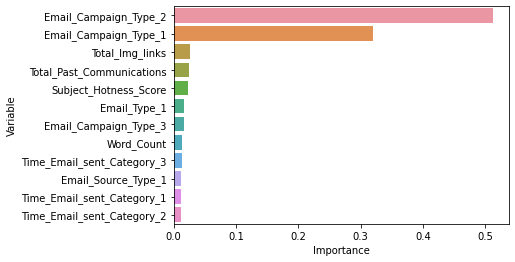

In [ ]:
#visualising feature importance of XGB
feature_imp_xgb = pd.DataFrame({"Variable": x_train_smote.columns,"Importance": xgb_smote.feature_importances_})
feature_imp_xgb.sort_values(by="Importance", ascending=False, inplace = True)
sns.barplot(x=feature_imp_xgb['Importance'], y= feature_imp_xgb['Variable'])

## Here in XGBoost model we can see that Email_Campaign_Type features is having higher feature importances compared to others

In [ ]:
#adding list
add_list_to_final_df(xgb_eval_list)
#Taking a look of our final comparison dataframe
comparison_df

Model_Name  Train_Accuracy  ...  Test_F1score  Test_AUC
0            LogisticReg RUS        0.541974  ...      0.679839  0.762724
1          LogisticReg SMOTE        0.534806  ...      0.681386  0.765175
2     LogisticReg SMOTETomek        0.539820  ...      0.680234  0.765693
3          Decision Tree RUS        0.999122  ...      0.560687  0.596501
4        Decision Tree SMOTE        0.999416  ...      0.714710  0.610020
5   Decision Tree SMOTETomek        0.999396  ...      0.709754  0.601512
6          Random Forest RUS        0.565332  ...      0.684171  0.763473
7        Random Forest SMOTE        0.559560  ...      0.716764  0.762760
8   Random Forest SMOTETomek        0.564973  ...      0.713001  0.764783
9          RandomF Tuned RUS        0.744819  ...      0.676210  0.757659
10       RandomF Tuned SMOTE        0.907416  ...      0.749555  0.758103
11  RandomF Tuned SMOTETomek        0.909062  ...      0.749967  0.757643
12                   KNN RUS        0.651914  ...      0.648853  0.696987
13                 KNN SMOTE        0.881396  ...      0.656742  0.675614
14            KNN SMOTETomek        0.891083  ...      0.652044  0.677975
15             KNN Tuned RUS        0.624341  ...      0.645603  0.712057
16           KNN Tuned SMOTE        0.879917  ...      0.674390  0.682578
17      KNN Tuned SMOTETomek        0.891083  ...      0.652044  0.677975
18                   XGB RUS        0.986653  ...      0.639649  0.731730
19                 XGB SMOTE        0.914234  ...      0.760662  0.762375
20            XGB SMOTETomek        0.916550  ...      0.762416  0.762111

[21 rows x 11 columns]

#**Conclusion:**
##**Evaluation Metrics:**

There is a number of model evaluation metrics to choose from but since our dataset was highly imbalanced, it is critical to understand which metric should be evaluated to understand the model performance.

* Accuracy- Accuracy simply measures how often the classifier correctly predicts. We can define accuracy as the ratio of the number of correct predictions and the total number of predictions. Accuracy is useful when the target class is well balanced but is not a good choice for the unbalanced classes, because if the model poorly predicts every observation as of the majority class, we are going to get a pretty high accuracy.

* Confusion Matrix - It is a performance measurement criteria for the machine learning classification problems where we get a table with a combination of predicted and actual values.

* Precision - Precision for a label is defined as the number of true positives divided by the number of predicted positives.

* Recall - Recall for a label is defined as the number of true positives divided by the total number of actual positives. Recall explains how many of the actual positive cases we were able to predict correctly with our model.

* F1 Score - It's actually the harmonic mean of Precision and Recall. It is maximum when Precision is equal to Recall.

* AUC ROC - The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes. When AUC is 0.5, the classifier is not able to distinguish between the classes and when it's closer to 1,the more good it becomes in distingushing them.

##So among all the above metrics, which metric should be prioritised in comparing the performance of our various models? That's the major question here as we have a multiclass classification problem, where the problem statement just asks us to track and classify between ignored, read and acknowledged classes, we can not decide here what we want to prioritise in terms of classification, we just want to correctly classify and characterize accordingly. On top of that our data is highly imbalanced, which we tried to encounter in the ways possible.

##When we have a high class imbalance, we'll choose the F1 score because a high F1 score considers both precision and recall. To get a high F1, both false positives and false negatives must be low. The F1 score depends on how highly imbalanced our dataset is!

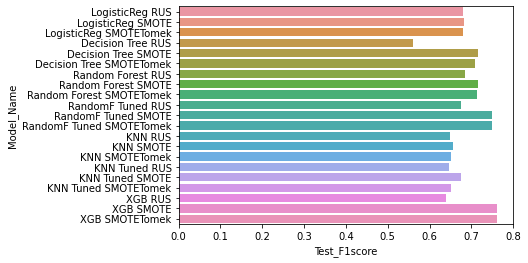

In [ ]:
#visualising our comparison df for f1 score
sns.barplot(y=comparison_df['Model_Name'], x = comparison_df['Test_F1score'])

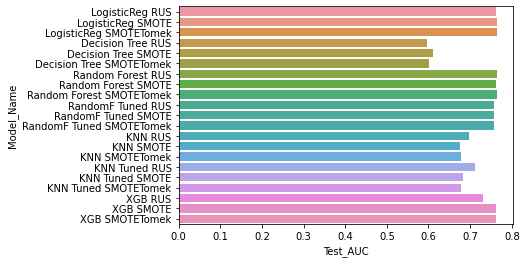

In [ ]:
#visualising for auc
sns.barplot(y=comparison_df['Model_Name'], x = comparison_df['Test_AUC'])

In [ ]:
#sorting values
comparison_df.sort_values(by=["Test_F1score",'Test_AUC'], ascending=(False,False), inplace = True, ignore_index = True)
comparison_df

Model_Name  Train_Accuracy  ...  Test_F1score  Test_AUC
0             XGB SMOTETomek        0.916550  ...      0.762416  0.762111
1                  XGB SMOTE        0.914234  ...      0.760662  0.762375
2   RandomF Tuned SMOTETomek        0.909062  ...      0.749967  0.757643
3        RandomF Tuned SMOTE        0.907416  ...      0.749555  0.758103
4        Random Forest SMOTE        0.559560  ...      0.716764  0.762760
5        Decision Tree SMOTE        0.999416  ...      0.714710  0.610020
6   Random Forest SMOTETomek        0.564973  ...      0.713001  0.764783
7   Decision Tree SMOTETomek        0.999396  ...      0.709754  0.601512
8          Random Forest RUS        0.565332  ...      0.684171  0.763473
9          LogisticReg SMOTE        0.534806  ...      0.681386  0.765175
10    LogisticReg SMOTETomek        0.539820  ...      0.680234  0.765693
11           LogisticReg RUS        0.541974  ...      0.679839  0.762724
12         RandomF Tuned RUS        0.744819  ...      0.676210  0.757659
13           KNN Tuned SMOTE        0.879917  ...      0.674390  0.682578
14                 KNN SMOTE        0.881396  ...      0.656742  0.675614
15            KNN SMOTETomek        0.891083  ...      0.652044  0.677975
16      KNN Tuned SMOTETomek        0.891083  ...      0.652044  0.677975
17                   KNN RUS        0.651914  ...      0.648853  0.696987
18             KNN Tuned RUS        0.624341  ...      0.645603  0.712057
19                   XGB RUS        0.986653  ...      0.639649  0.731730
20         Decision Tree RUS        0.999122  ...      0.560687  0.596501

[21 rows x 11 columns]

## we can see that XGB SMOTETomek is having highest Test_F1score and	Test_AUC compare to other models